#**CS210** **Project** **Final Report**

Group Members 


1.   List item
2.   List item



# Importing Libraries

In [255]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

#Introduction

The main research topics of this project is investigating the trends of climate change and agricultural productivity in Turkey with respect to time. After that the relation between these two topics will be investigated with using various data science methods and approaches.

# Data Collection

Data sources for the project is searched online from various data sources. These data sources are Turkish State Meterological Service (MGM), Turkish Statistical Institute (TÜİK),  Türkiye Ministry of Agriculture and Forestry, Türkiye Ministry of Environment,  European Drought Observatory (EDO) and WorldBank Climate Change Knowledge Portal. Many number of different datasets are downloaded from these sources. Then the selected and cleaned dataset from these collection is used in the project for data analysis.

# Dataset Reading



## Crop Production and Crop Lands

This is the main data of this project. It is about the crop production of Turkey. The data includes crop number, crop area and crop production of Turkey is achieved from Türkiye Ministry of Agriculture and Forestry. 

In [185]:
crop_df = pd.read_csv('crop_production.csv', sep=';')
crop_df = crop_df.applymap(lambda x: pd.to_numeric(str(x).replace(' ', ''), errors='coerce'))
crop_df = crop_df.loc[:, ~crop_df.columns.str.startswith('Unnamed')]
crop_df

,year,crop number,crop area,crop production
0,1979,70,55412.0,248630.0
1,1980,69,59465.0,260132.0
2,1981,64,60123.0,259467.0
3,1982,70,62547.0,255789.0
4,1983,68,63300.0,259633.0
5,1984,70,63210.0,264029.0
6,1985,74,67894.0,273001.0
7,1986,82,70658.0,278607.0
8,1987,78,74122.0,280478.0
9,1988,84,77456.0,286333.0


## Temperature

This is the data about the climate of Turkey. The data of average, max and min temperature of Turkey is achieved from World Bank. This data includes the average, max and min temperature of Turkey throughout years and months. The average, max and min temperature by years is used.

In [186]:
avg_temp_df = pd.read_csv('average_temp.csv')
avg_temp_df = avg_temp_df.rename(columns={avg_temp_df.columns[0]: 'year'})
avg_temp_df

,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1901,-1.87,2.39,7.17,10.52,13.95,19.58,22.21,22.07,17.33,12.08,5.65,4.01
1,1902,0.95,2.62,4.59,8.98,13.70,18.62,20.77,21.98,17.34,12.35,3.49,-0.31
2,1903,-1.19,0.86,4.09,10.41,14.46,18.29,21.41,21.50,17.06,12.85,6.48,1.97
3,1904,-2.94,3.04,3.92,8.09,13.07,17.58,21.54,21.62,17.70,13.38,6.08,0.95
4,1905,-2.49,-0.88,3.81,9.09,13.87,18.29,22.08,22.28,18.73,14.43,8.85,0.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2017,-1.94,0.66,6.44,10.00,14.68,19.65,23.82,23.63,20.91,12.97,7.17,4.12
117,2018,2.14,4.86,8.85,12.85,16.15,19.70,23.26,23.36,19.86,14.52,8.15,3.11
118,2019,1.09,2.88,5.70,9.26,16.30,20.73,22.03,23.11,19.24,15.70,8.95,3.95
119,2020,0.68,2.45,7.43,10.15,15.25,19.25,23.62,22.95,21.59,16.34,7.50,4.24


In [187]:
avg_temp_df['average'] = avg_temp_df.iloc[:, 1:].mean(axis=1)
avg_temp_df

,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,average
0,1901,-1.87,2.39,7.17,10.52,13.95,19.58,22.21,22.07,17.33,12.08,5.65,4.01,11.257500
1,1902,0.95,2.62,4.59,8.98,13.70,18.62,20.77,21.98,17.34,12.35,3.49,-0.31,10.423333
2,1903,-1.19,0.86,4.09,10.41,14.46,18.29,21.41,21.50,17.06,12.85,6.48,1.97,10.682500
3,1904,-2.94,3.04,3.92,8.09,13.07,17.58,21.54,21.62,17.70,13.38,6.08,0.95,10.335833
4,1905,-2.49,-0.88,3.81,9.09,13.87,18.29,22.08,22.28,18.73,14.43,8.85,0.83,10.740833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2017,-1.94,0.66,6.44,10.00,14.68,19.65,23.82,23.63,20.91,12.97,7.17,4.12,11.842500
117,2018,2.14,4.86,8.85,12.85,16.15,19.70,23.26,23.36,19.86,14.52,8.15,3.11,13.067500
118,2019,1.09,2.88,5.70,9.26,16.30,20.73,22.03,23.11,19.24,15.70,8.95,3.95,12.411667
119,2020,0.68,2.45,7.43,10.15,15.25,19.25,23.62,22.95,21.59,16.34,7.50,4.24,12.620833


In [188]:
max_temp_df = pd.read_csv('max_temp.csv')
max_temp_df.rename(columns={max_temp_df.columns[0]: 'year'}, inplace=True)
max_temp_df

,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1901,2.57,7.20,13.07,17.11,20.51,27.10,29.49,29.41,25.03,18.70,10.86,8.33
1,1902,5.71,6.97,10.18,15.49,20.57,25.45,28.73,30.08,25.08,18.49,8.42,3.41
2,1903,2.75,5.09,9.08,15.99,20.61,25.07,28.61,28.85,24.36,19.03,11.41,5.74
3,1904,1.05,7.40,8.75,13.65,19.19,24.40,28.78,28.94,24.90,19.36,10.96,4.75
4,1905,1.62,3.31,8.48,14.76,20.01,25.07,29.17,29.42,26.00,20.64,13.82,4.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2017,2.16,5.84,11.78,16.24,20.83,26.48,31.37,30.86,28.77,19.34,12.36,8.67
117,2018,6.10,9.65,14.19,19.51,22.22,26.45,30.39,30.54,26.92,20.65,12.79,6.43
118,2019,4.89,7.43,11.02,14.59,23.07,27.35,29.10,30.22,26.37,22.30,15.00,7.75
119,2020,4.84,6.88,12.63,16.06,21.88,26.15,30.78,30.46,28.91,23.36,12.81,8.55


In [189]:
max_temp_df['average'] = max_temp_df.iloc[:, 1:].mean(axis=1)
max_temp_df

,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,average
0,1901,2.57,7.20,13.07,17.11,20.51,27.10,29.49,29.41,25.03,18.70,10.86,8.33,17.448333
1,1902,5.71,6.97,10.18,15.49,20.57,25.45,28.73,30.08,25.08,18.49,8.42,3.41,16.548333
2,1903,2.75,5.09,9.08,15.99,20.61,25.07,28.61,28.85,24.36,19.03,11.41,5.74,16.382500
3,1904,1.05,7.40,8.75,13.65,19.19,24.40,28.78,28.94,24.90,19.36,10.96,4.75,16.010833
4,1905,1.62,3.31,8.48,14.76,20.01,25.07,29.17,29.42,26.00,20.64,13.82,4.50,16.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2017,2.16,5.84,11.78,16.24,20.83,26.48,31.37,30.86,28.77,19.34,12.36,8.67,17.891667
117,2018,6.10,9.65,14.19,19.51,22.22,26.45,30.39,30.54,26.92,20.65,12.79,6.43,18.820000
118,2019,4.89,7.43,11.02,14.59,23.07,27.35,29.10,30.22,26.37,22.30,15.00,7.75,18.257500
119,2020,4.84,6.88,12.63,16.06,21.88,26.15,30.78,30.46,28.91,23.36,12.81,8.55,18.609167


In [190]:
min_temp_df = pd.read_csv('min_temp.csv')
min_temp_df.rename(columns={min_temp_df.columns[0]: 'year'}, inplace=True)
min_temp_df

,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1901,-6.33,-2.40,1.30,3.98,7.45,12.12,14.99,14.78,9.68,5.51,0.46,-0.29
1,1902,-3.79,-1.73,-0.99,2.50,6.89,11.83,12.86,13.93,9.64,6.26,-1.41,-4.03
2,1903,-5.12,-3.36,-0.88,4.88,8.35,11.56,14.27,14.20,9.81,6.73,1.59,-1.79
3,1904,-6.94,-1.31,-0.88,2.57,7.00,10.82,14.34,14.36,10.56,7.46,1.22,-2.83
4,1905,-6.61,-5.07,-0.83,3.46,7.79,11.56,15.04,15.19,11.51,8.28,3.93,-2.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2017,-6.06,-4.52,1.13,3.81,8.57,12.88,16.33,16.44,13.10,6.66,2.02,-0.41
117,2018,-1.80,0.10,3.55,6.24,10.14,13.01,16.18,16.22,12.86,8.43,3.55,-0.20
118,2019,-2.71,-1.65,0.40,3.97,9.57,14.16,15.01,16.05,12.16,9.15,2.94,0.17
119,2020,-3.48,-1.97,2.28,4.29,8.68,12.41,16.50,15.49,14.32,9.37,2.23,-0.04


In [191]:
min_temp_df['average'] = min_temp_df.iloc[:, 1:].mean(axis=1)
min_temp_df

,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,average
0,1901,-6.33,-2.40,1.30,3.98,7.45,12.12,14.99,14.78,9.68,5.51,0.46,-0.29,5.104167
1,1902,-3.79,-1.73,-0.99,2.50,6.89,11.83,12.86,13.93,9.64,6.26,-1.41,-4.03,4.330000
2,1903,-5.12,-3.36,-0.88,4.88,8.35,11.56,14.27,14.20,9.81,6.73,1.59,-1.79,5.020000
3,1904,-6.94,-1.31,-0.88,2.57,7.00,10.82,14.34,14.36,10.56,7.46,1.22,-2.83,4.697500
4,1905,-6.61,-5.07,-0.83,3.46,7.79,11.56,15.04,15.19,11.51,8.28,3.93,-2.82,5.119167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2017,-6.06,-4.52,1.13,3.81,8.57,12.88,16.33,16.44,13.10,6.66,2.02,-0.41,5.829167
117,2018,-1.80,0.10,3.55,6.24,10.14,13.01,16.18,16.22,12.86,8.43,3.55,-0.20,7.356667
118,2019,-2.71,-1.65,0.40,3.97,9.57,14.16,15.01,16.05,12.16,9.15,2.94,0.17,6.601667
119,2020,-3.48,-1.97,2.28,4.29,8.68,12.41,16.50,15.49,14.32,9.37,2.23,-0.04,6.673333


## Drought Index

This is the data about the drougth of Turkey. It is achieved from European Drought Observatory. This data includes the drought index.

In [192]:
drought_df = pd.read_csv('drought_index.csv')
drought_df.columns = ['year', 'drought_idx']
drought_df

,year,drought_idx
0,1969,-0.39
1,1970,-0.43
2,1971,-0.42
3,1972,-0.39
4,1973,-0.42
5,1974,-0.44
6,1975,-0.48
7,1976,-0.53
8,1977,-0.62
9,1978,-0.44


## Precipitation

This is the data about the raining in Turkey. The data of precipitation of Turkey is achieved from World Bank. 

In [271]:
precipitataion_df = pd.read_csv('precipitation_measurement.csv', usecols=[0, 1], dtype={'year': int, 'precipitation': float})
precipitataion_df.columns = ['year', 'precipitation']
precipitataion_df['year'] = precipitataion_df['year'].replace([np.nan, np.inf, -np.inf], -1)
precipitataion_df['year'] = precipitataion_df['year'].astype(int)

precipitataion_df = precipitataion_df.iloc[1:]
precipitataion_df

,year,precipitation
1,1901,568.16
2,1902,596.46
3,1903,537.63
4,1904,644.01
5,1905,540.02
...,...,...
117,2017,536.38
118,2018,700.55
119,2019,602.90
120,2020,554.74


## Water Sources

This is the data about the water sources in Turkey. The data of total water source and various sources of water in Turkey is achieved from TÜİK.


In [194]:
water_sources_df = pd.read_csv('water_sources.csv', sep=';')
water_sources_df = water_sources_df.rename(columns={water_sources_df.columns[0]: 'year'})
water_sources_df = water_sources_df.dropna(axis=1, how='all')
water_sources_df = water_sources_df.transpose()
water_sources_df.columns = water_sources_df.iloc[0]
water_sources_df = water_sources_df[1:]
water_sources_df = water_sources_df.reset_index()
water_sources_df = water_sources_df.rename(columns={water_sources_df.columns[0]: 'year'})
water_sources_df = water_sources_df.rename_axis(None, axis=1)
water_sources_df = water_sources_df.applymap(lambda x: pd.to_numeric(str(x).replace(' ', ''), errors='coerce'))
water_sources_df.rename(columns={water_sources_df.columns[0]: 'year'}, inplace=True)
water_sources_df = water_sources_df.loc[::2].reset_index(drop=True)
water_sources_df['year'] = water_sources_df['year'].astype(int)
water_sources_df.rename(columns={water_sources_df.columns[0]: 'year', 
                               water_sources_df.columns[1]: 'total water source', 
                               water_sources_df.columns[2]: 'dam', 
                               water_sources_df.columns[3]: 'well', 
                               water_sources_df.columns[4]: 'spring', 
                               water_sources_df.columns[5]: 'river', 
                               water_sources_df.columns[6]: 'lake&sea'}, inplace=True)

water_sources_df

,year,total water source,dam,well,spring,river,lake&sea
0,1994,3242733.0,899707.0,1295410.0,837622.0,101270.0,108724.0
1,1995,3732608.0,976763.0,1451466.0,912014.0,108439.0,283925.0
2,1996,3938678.0,1033072.0,1521606.0,930533.0,167152.0,286314.0
3,1997,4080963.0,1077831.0,1378715.0,1060344.0,273452.0,290620.0
4,1998,4175011.0,1174198.0,1591410.0,984734.0,135606.0,289064.0
5,2001,4664411.0,1389239.0,1598865.0,1082992.0,131754.0,461562.0
6,2002,4813097.0,1795963.0,1455114.0,1294660.0,131295.0,136065.0
7,2003,4918477.0,1925653.0,1547717.0,1206396.0,141194.0,97517.0
8,2004,4954292.0,1984739.0,1375738.0,1363360.0,143062.0,87392.0
9,2006,5163500.0,1843736.0,1401815.0,1380057.0,305271.0,232621.0


In [195]:
water_sources_df.columns

Index(['year', 'total water source', 'dam', 'well', 'spring', 'river',
       'lake&sea'],
      dtype='object')

## Greenhouse Gas Emissions

This is the data about the greenhouse gas emissions in Turkey. The data of total greenhouse gas emissions and emissions of some individuals in Turkey is achieved from  Türkiye Ministry of Environment.

In [196]:
gh_emission_df = pd.read_csv('greenhouse_emission.csv', sep=';')
gh_emission_df = gh_emission_df.apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',', '.'), errors='coerce'))
gh_emission_df 

,year,total,co2,ch4,n2o,f gasses
0,1972,100.4,128.4,39.8,21.5,0.4
1,1973,113.7,130.7,40.7,21.9,0.4
2,1974,118.7,135.4,40.1,22.3,0.5
3,1975,124.3,137.3,40.3,22.6,0.3
4,1976,132.8,136.8,40.6,22.0,0.5
5,1977,144.0,141.3,41.2,23.2,0.5
6,1978,150.4,139.6,40.6,24.2,0.6
7,1979,158.7,140.7,40.8,24.3,0.4
8,1980,162.7,142.7,42.7,24.9,0.4
9,1981,170.8,143.2,40.5,24.8,0.4


# Data Preprocessing

After data reading is done, data preprocessing is done on the datasets. NaN values are detected and they are filled with interpolatipon. After that dataset info, data types and statistical summary of each dataset is printed for control and investigation purposes.

In [197]:
datasets = [crop_df,avg_temp_df,max_temp_df,min_temp_df,
            drought_df,water_sources_df,precipitataion_df,
            gh_emission_df]

## Checking the null values and Filling Them


In [198]:
crop_df.isnull().sum()

year               0
crop number        0
crop area          5
crop production    3
dtype: int64

In [199]:
avg_temp_df.isnull().sum()

year       0
Jan        0
Feb        0
Mar        0
Apr        0
May        0
Jun        0
Jul        0
Aug        0
Sep        0
Oct        0
Nov        0
Dec        0
average    0
dtype: int64

In [200]:
max_temp_df.isnull().sum()

year       0
Jan        0
Feb        0
Mar        0
Apr        0
May        0
Jun        0
Jul        0
Aug        0
Sep        0
Oct        0
Nov        0
Dec        0
average    0
dtype: int64

In [201]:
min_temp_df.isnull().sum()

year       0
Jan        0
Feb        0
Mar        0
Apr        0
May        0
Jun        0
Jul        0
Aug        0
Sep        0
Oct        0
Nov        0
Dec        0
average    0
dtype: int64

In [202]:
drought_df.isnull().sum()

year           0
drought_idx    0
dtype: int64

In [203]:
water_sources_df.isnull().sum()

year                  0
total water source    0
dam                   0
well                  0
spring                0
river                 0
lake&sea              0
dtype: int64

In [204]:
precipitataion_df.isnull().sum()

year             0
precipitation    0
dtype: int64

In [205]:
gh_emission_df.isnull().sum()

year        0
total       0
co2         0
ch4         0
n2o         0
f gasses    0
dtype: int64

### Filling the NaN values

NaN values in the dataset is filled with interpolation.

In [206]:
rows_with_null = crop_df[crop_df.isnull().any(axis=1)]
print(rows_with_null)

    year  crop number  crop area  crop production
32  2011          225        NaN        2406606.0
34  2013          213   853231.0              NaN
35  2014          208        NaN              NaN
36  2015          197        NaN              NaN
37  2016          238        NaN        1523896.0
38  2017          214        NaN        1506789.0


In [207]:
crop_df.interpolate(inplace=True)

In [208]:
crop_df.isnull().sum()

year               0
crop number        0
crop area          0
crop production    0
dtype: int64

In [209]:
crop_df

,year,crop number,crop area,crop production
0,1979,70,55412.0,248630.0
1,1980,69,59465.0,260132.0
2,1981,64,60123.0,259467.0
3,1982,70,62547.0,255789.0
4,1983,68,63300.0,259633.0
5,1984,70,63210.0,264029.0
6,1985,74,67894.0,273001.0
7,1986,82,70658.0,278607.0
8,1987,78,74122.0,280478.0
9,1988,84,77456.0,286333.0


## Dataset Summary and Statistics

### Dataset Info

In [210]:
crop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             43 non-null     int64  
 1   crop number      43 non-null     int64  
 2   crop area        43 non-null     float64
 3   crop production  43 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.5 KB


In [211]:
avg_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     121 non-null    int64  
 1   Jan      121 non-null    float64
 2   Feb      121 non-null    float64
 3   Mar      121 non-null    float64
 4   Apr      121 non-null    float64
 5   May      121 non-null    float64
 6   Jun      121 non-null    float64
 7   Jul      121 non-null    float64
 8   Aug      121 non-null    float64
 9   Sep      121 non-null    float64
 10  Oct      121 non-null    float64
 11  Nov      121 non-null    float64
 12  Dec      121 non-null    float64
 13  average  121 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 13.4 KB


In [212]:
max_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     121 non-null    int64  
 1   Jan      121 non-null    float64
 2   Feb      121 non-null    float64
 3   Mar      121 non-null    float64
 4   Apr      121 non-null    float64
 5   May      121 non-null    float64
 6   Jun      121 non-null    float64
 7   Jul      121 non-null    float64
 8   Aug      121 non-null    float64
 9   Sep      121 non-null    float64
 10  Oct      121 non-null    float64
 11  Nov      121 non-null    float64
 12  Dec      121 non-null    float64
 13  average  121 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 13.4 KB


In [213]:
min_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     121 non-null    int64  
 1   Jan      121 non-null    float64
 2   Feb      121 non-null    float64
 3   Mar      121 non-null    float64
 4   Apr      121 non-null    float64
 5   May      121 non-null    float64
 6   Jun      121 non-null    float64
 7   Jul      121 non-null    float64
 8   Aug      121 non-null    float64
 9   Sep      121 non-null    float64
 10  Oct      121 non-null    float64
 11  Nov      121 non-null    float64
 12  Dec      121 non-null    float64
 13  average  121 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 13.4 KB


In [214]:
max_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     121 non-null    int64  
 1   Jan      121 non-null    float64
 2   Feb      121 non-null    float64
 3   Mar      121 non-null    float64
 4   Apr      121 non-null    float64
 5   May      121 non-null    float64
 6   Jun      121 non-null    float64
 7   Jul      121 non-null    float64
 8   Aug      121 non-null    float64
 9   Sep      121 non-null    float64
 10  Oct      121 non-null    float64
 11  Nov      121 non-null    float64
 12  Dec      121 non-null    float64
 13  average  121 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 13.4 KB


In [215]:
drought_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         53 non-null     int64  
 1   drought_idx  53 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 976.0 bytes


In [216]:
water_sources_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                17 non-null     int64  
 1   total water source  17 non-null     float64
 2   dam                 17 non-null     float64
 3   well                17 non-null     float64
 4   spring              17 non-null     float64
 5   river               17 non-null     float64
 6   lake&sea            17 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 1.1 KB


In [217]:
precipitataion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 1 to 121
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           121 non-null    int64 
 1   precipitation  121 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.0+ KB


In [218]:
gh_emission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      50 non-null     int64  
 1   total     50 non-null     float64
 2   co2       50 non-null     float64
 3   ch4       50 non-null     float64
 4   n2o       50 non-null     float64
 5   f gasses  50 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 2.5 KB


### Data Types
We show the data type of each column.

In [219]:
crop_df.dtypes

year                 int64
crop number          int64
crop area          float64
crop production    float64
dtype: object

In [220]:
avg_temp_df.dtypes

year         int64
Jan        float64
Feb        float64
Mar        float64
Apr        float64
May        float64
Jun        float64
Jul        float64
Aug        float64
Sep        float64
Oct        float64
Nov        float64
Dec        float64
average    float64
dtype: object

In [221]:
max_temp_df.dtypes

year         int64
Jan        float64
Feb        float64
Mar        float64
Apr        float64
May        float64
Jun        float64
Jul        float64
Aug        float64
Sep        float64
Oct        float64
Nov        float64
Dec        float64
average    float64
dtype: object

In [222]:
min_temp_df.dtypes

year         int64
Jan        float64
Feb        float64
Mar        float64
Apr        float64
May        float64
Jun        float64
Jul        float64
Aug        float64
Sep        float64
Oct        float64
Nov        float64
Dec        float64
average    float64
dtype: object

In [223]:
drought_df.dtypes

year             int64
drought_idx    float64
dtype: object

In [224]:
water_sources_df.dtypes

year                    int64
total water source    float64
dam                   float64
well                  float64
spring                float64
river                 float64
lake&sea              float64
dtype: object

In [225]:
precipitataion_df.dtypes

year              int64
precipitation    object
dtype: object

In [226]:
gh_emission_df.dtypes

year          int64
total       float64
co2         float64
ch4         float64
n2o         float64
f gasses    float64
dtype: object

### Statistical Summary
We show the data type of each column.

In [227]:
crop_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,43.0,2000.000000,12.556539,1979.0,1989.5,2000.0,2010.5,2021.0
crop number,43.0,148.697674,63.573181,64.0,84.5,137.0,210.0,263.0
crop area,43.0,439061.906977,423150.847026,55412.0,76230.0,192789.0,758626.5,1342566.0
crop production,43.0,929057.953488,744757.185424,248630.0,294506.5,458095.0,1572181.0,2473600.0


In [228]:
avg_temp_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,121.0,1961.000000,35.073732,1901.000000,1931.000000,1961.0000,1991.000000,2021.00
Jan,121.0,-0.332149,1.864792,-4.730000,-1.870000,-0.1200,1.160000,3.76
Feb,121.0,0.957107,2.052043,-3.710000,-0.370000,1.0700,2.400000,5.49
Mar,121.0,4.755620,1.771704,0.360000,3.640000,4.9800,5.850000,9.28
Apr,121.0,9.818512,1.283391,6.910000,8.980000,9.6700,10.600000,13.20
May,121.0,14.510165,1.015026,11.850000,13.950000,14.5500,15.110000,17.16
Jun,121.0,18.619339,0.881116,16.530000,18.070000,18.6000,19.200000,20.86
Jul,121.0,21.994298,0.849773,19.970000,21.570000,21.9600,22.430000,24.22
Aug,121.0,22.043140,1.002652,19.510000,21.390000,22.0200,22.620000,24.55
Sep,121.0,18.270992,1.142384,15.760000,17.560000,18.3300,18.840000,21.59


In [229]:
max_temp_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,121.0,1961.000000,35.073732,1901.000000,1931.0000,1961.000000,1991.000000,2021.0000
Jan,121.0,3.734132,1.814153,-0.150000,2.3300,3.850000,5.040000,7.8200
Feb,121.0,5.368099,2.213670,0.540000,3.6700,5.470000,6.690000,10.5200
Mar,121.0,9.785124,2.036372,4.860000,8.4000,9.930000,11.190000,15.0400
Apr,121.0,15.515455,1.604600,12.060000,14.3000,15.360000,16.410000,20.2700
May,121.0,20.771405,1.232486,17.940000,20.0100,20.810000,21.580000,24.2500
Jun,121.0,25.450992,0.974772,23.270000,24.8300,25.400000,26.140000,27.9100
Jul,121.0,29.211983,0.905708,26.740000,28.7500,29.130000,29.630000,31.8800
Aug,121.0,29.417851,1.086840,26.430000,28.6600,29.360000,30.170000,32.1600
Sep,121.0,25.560248,1.282397,22.880000,24.7500,25.450000,26.370000,28.9100


In [230]:
min_temp_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,121.0,1961.000000,35.073732,1901.0000,1931.00,1961.000000,1991.0000,2021.000000
Jan,121.0,-4.399339,1.995035,-10.1600,-5.77,-4.110000,-2.8900,-0.280000
Feb,121.0,-3.449421,1.972299,-7.9800,-4.64,-3.260000,-2.0600,0.490000
Mar,121.0,-0.250248,1.604820,-4.1300,-1.31,-0.030000,0.9700,3.570000
Apr,121.0,4.166446,1.073788,1.6000,3.44,4.090000,4.9200,6.550000
May,121.0,8.299835,0.888083,5.8100,7.75,8.400000,8.8100,10.920000
Jun,121.0,11.837521,0.846112,9.7700,11.35,11.800000,12.2600,14.160000
Jul,121.0,14.825455,0.855183,12.4100,14.30,14.780000,15.3900,16.820000
Aug,121.0,14.717355,0.977214,12.6500,14.01,14.660000,15.2700,16.990000
Sep,121.0,11.031901,1.096381,8.6400,10.25,11.010000,11.7000,14.320000


In [231]:
drought_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,53.0,1995.000000,15.443445,1969.00,1982.00,1995.00,2008.0,2021.00
drought_idx,53.0,-0.850566,0.427872,-1.81,-1.14,-0.62,-0.5,-0.39


In [232]:
water_sources_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,17.0,2.005529e+03,8.367479,1994.0,1998.0,2004.0,2012.0,2020.0
total water source,17.0,4.806644e+06,849991.996097,3242733.0,4175011.0,4813097.0,5163500.0,6492402.0
dam,17.0,1.777106e+06,594012.009162,899707.0,1174198.0,1843736.0,2252421.0,2658335.0
well,17.0,1.481992e+06,166574.790657,1273822.0,1378715.0,1451466.0,1563154.0,1903511.0
spring,17.0,1.071424e+06,157138.348088,837622.0,984734.0,1015865.0,1138388.0,1380057.0
river,17.0,2.630889e+05,205100.538605,78282.0,131754.0,159472.0,305271.0,656985.0
lake&sea,17.0,2.130331e+05,107780.354078,83154.0,104354.0,232621.0,286314.0,461562.0


In [233]:
precipitataion_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,121.0,1961.0,35.073732,1901.0,1931.0,1961.0,1991.0,2021.0


In [234]:
gh_emission_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,50.0,1996.500,14.577380,1972.0,1984.250,1996.50,2008.750,2021.0
total,50.0,291.904,131.345286,100.4,190.750,272.70,394.325,564.4
co2,50.0,233.338,101.329227,128.4,148.825,203.75,315.575,452.7
ch4,50.0,46.500,7.133766,39.8,41.975,43.00,50.125,64.0
n2o,50.0,26.532,4.688302,21.5,23.825,24.80,27.100,40.5
f gasses,50.0,1.798,2.066496,0.3,0.400,0.50,2.300,7.4


## Main Dataset Creation

After the preprocessing of the various datasets are finished, different datasets are merged with the common year range in order to form the main dataset.

In [236]:
avg_temp_df = avg_temp_df[["year","average"]]
avg_temp_df.rename(columns={'average': 'average_temp'}, inplace=True)
max_temp_df = max_temp_df[["year","average"]]
max_temp_df.rename(columns={'average': 'min_temp'}, inplace=True)
min_temp_df = min_temp_df[["year","average"]]
min_temp_df.rename(columns={'average': 'max_temp'}, inplace=True)

<ipython-input-236-55242782dcc0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_temp_df.rename(columns={'average': 'average_temp'}, inplace=True)
<ipython-input-236-55242782dcc0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_temp_df.rename(columns={'average': 'min_temp'}, inplace=True)
<ipython-input-236-55242782dcc0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min_temp_df.rename(columns={'average': 'max_temp'}, inpla

In [237]:
datasets = [crop_df,avg_temp_df,max_temp_df,min_temp_df,
            drought_df,precipitataion_df,
            gh_emission_df]

In [238]:
year_ranges = []
for dataset in datasets:
    min_year = dataset['year'].min()
    max_year = dataset['year'].max()
    year_ranges.append((min_year, max_year))

common_min_year = max(year[0] for year in year_ranges)
common_max_year = min(year[1] for year in year_ranges)

print("Common range is:",common_min_year,"-",common_max_year)

Common range is: 1979 - 2021


In [239]:
main_df = pd.DataFrame()
for df in datasets:
    if main_df.empty:
        main_df = df
    else:
        main_df = pd.merge(main_df, df, on="year", how="left")

In [240]:
main_df

,year,crop number,crop area,crop production,average_temp,min_temp,max_temp,drought_idx,precipitation,total,co2,ch4,n2o,f gasses
0,1979,70,55412.0,248630.0,11.624167,17.310000,5.976667,-0.42,647.01,158.7,140.7,40.8,24.3,0.4
1,1980,69,59465.0,260132.0,10.720833,16.394167,5.080000,-0.46,610.89,162.7,142.7,42.7,24.9,0.4
2,1981,64,60123.0,259467.0,11.518333,17.139167,5.933333,-0.48,691.92,170.8,143.2,40.5,24.8,0.4
3,1982,70,62547.0,255789.0,10.380833,15.951667,4.840000,-0.52,526.34,174.6,142.4,41.9,24.3,0.4
4,1983,68,63300.0,259633.0,10.551667,15.988333,5.146667,-0.48,626.87,183.9,149.2,42.3,25.1,0.4
5,1984,70,63210.0,264029.0,10.845833,16.470833,5.258333,-0.49,509.50,190.2,148.3,42.6,24.8,0.5
6,1985,74,67894.0,273001.0,10.803333,16.405000,5.235000,-0.50,567.07,192.4,148.7,42.7,23.3,0.3
7,1986,82,70658.0,278607.0,11.190000,17.044167,5.368333,-0.54,553.47,194.3,150.3,43.0,23.5,0.4
8,1987,78,74122.0,280478.0,10.598333,16.252500,4.974167,-0.56,680.78,202.3,151.6,41.3,22.9,0.6
9,1988,84,77456.0,286333.0,10.505000,15.942500,5.101667,-0.54,718.01,208.4,151.7,42.7,24.3,0.5


In [241]:
main_df.columns

Index(['year', 'crop number', 'crop area', 'crop production', 'average_temp',
       'min_temp', 'max_temp', 'drought_idx', 'precipitation', 'total', 'co2',
       'ch4', 'n2o', 'f gasses'],
      dtype='object')

# Dataset Summarization and Statistics

Once the main dataset is prepared, you can inspect the dataset's relevant information, data types, and statistical measures to gain insights and commence exploratory analysis.



### Dataset Info

In [242]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 0 to 42
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             43 non-null     int64  
 1   crop number      43 non-null     int64  
 2   crop area        43 non-null     float64
 3   crop production  43 non-null     float64
 4   average_temp     43 non-null     float64
 5   min_temp         43 non-null     float64
 6   max_temp         43 non-null     float64
 7   drought_idx      43 non-null     float64
 8   precipitation    43 non-null     object 
 9   total            43 non-null     float64
 10  co2              43 non-null     float64
 11  ch4              43 non-null     float64
 12  n2o              43 non-null     float64
 13  f gasses         43 non-null     float64
dtypes: float64(11), int64(2), object(1)
memory usage: 5.0+ KB


### Data Types
We show the data type of each column.

In [243]:
main_df.dtypes

year                 int64
crop number          int64
crop area          float64
crop production    float64
average_temp       float64
min_temp           float64
max_temp           float64
drought_idx        float64
precipitation       object
total              float64
co2                float64
ch4                float64
n2o                float64
f gasses           float64
dtype: object

### Statistical Summary
We show the data type of each column.

In [244]:
main_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,43.0,2000.000000,12.556539,1979.000000,1989.500000,2000.000000,2.010500e+03,2.021000e+03
crop number,43.0,148.697674,63.573181,64.000000,84.500000,137.000000,2.100000e+02,2.630000e+02
crop area,43.0,439061.906977,423150.847026,55412.000000,76230.000000,192789.000000,7.586265e+05,1.342566e+06
crop production,43.0,929057.953488,744757.185424,248630.000000,294506.500000,458095.000000,1.572181e+06,2.473600e+06
average_temp,43.0,11.431919,0.763156,9.540833,10.897500,11.396667,1.183833e+01,1.311000e+01
min_temp,43.0,17.181143,0.869825,15.109167,16.556667,17.139167,1.769042e+01,1.894250e+01
max_temp,43.0,5.717849,0.688940,4.000833,5.246667,5.725833,6.080000e+00,7.356667e+00
drought_idx,43.0,-0.942326,0.424140,-1.810000,-1.275000,-0.830000,-5.600000e-01,-4.200000e-01
total,43.0,318.858140,121.533141,158.700000,215.100000,280.300000,4.137000e+02,5.644000e+02
co2,43.0,249.241860,100.628715,140.700000,151.650000,213.600000,3.292500e+02,4.527000e+02


#Methods

After the data gathering and preprocessing stages, the main dataset has been formed. Now, we can proceed with exploratory data analysis by conducting visualizations and correlation calculations to support our hypothesis. The primary focus of our analysis is to examine the impact of temperature, precipitation, drought, water sources, and greenhouse gas emissions on crop production in Turkey. Additionally, we will perform hypothesis testing by calculating p-values to assess the significance of these variables in relation to crop production.

In [129]:
main_df.columns

Index(['year', 'crop number', 'crop area', 'crop production', 'average_temp',
       'min_temp', 'max_temp', 'drought_idx', 'precipitation', 'total', 'co2',
       'ch4', 'n2o', 'f gasses'],
      dtype='object')

##Visualization

### Change of every variable in years

<Figure size 1500x1000 with 0 Axes>

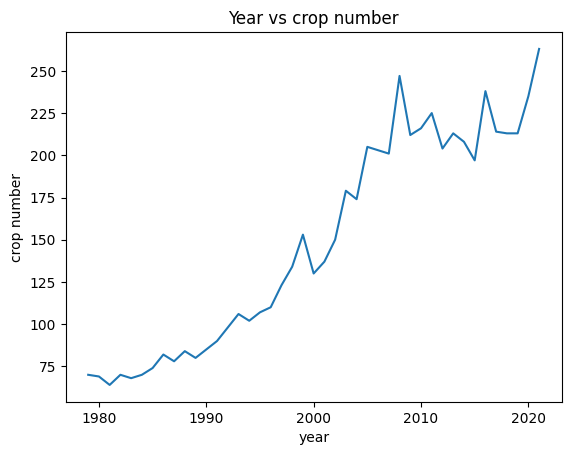

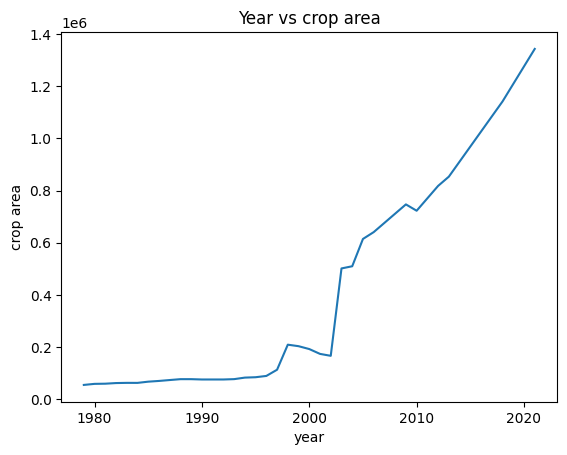

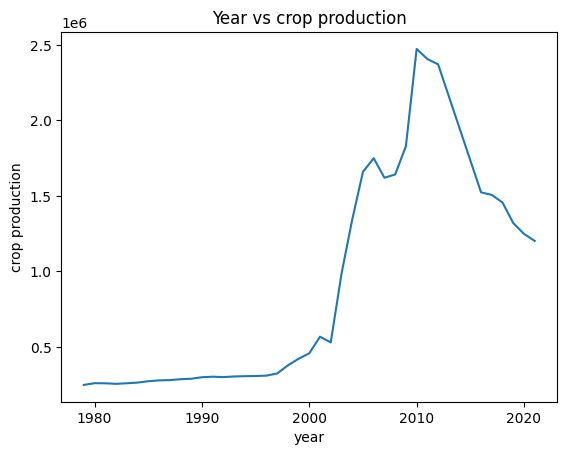

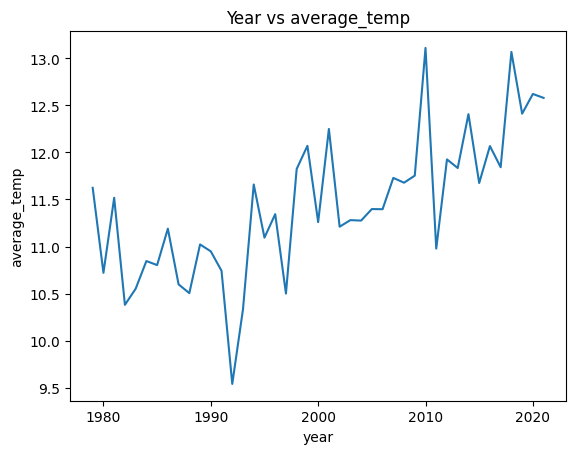

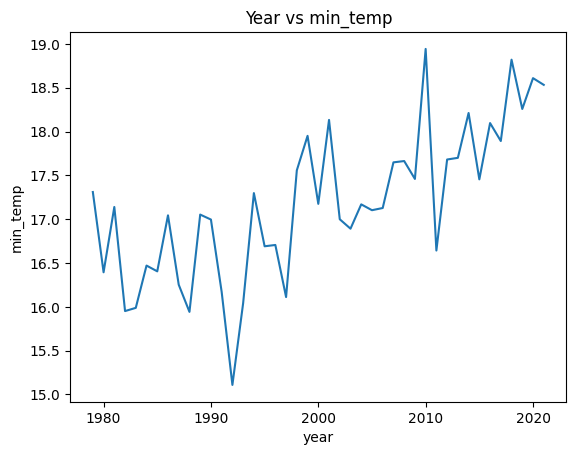

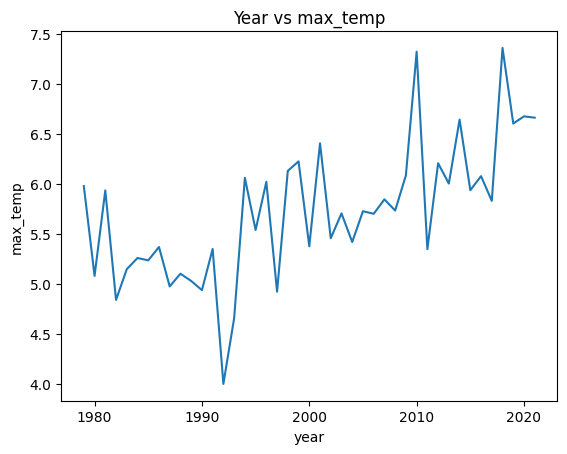

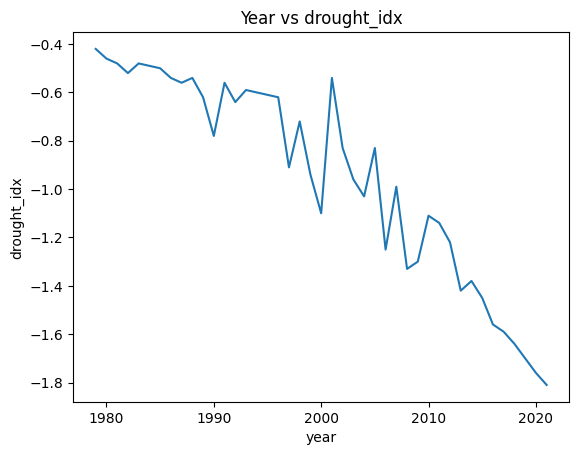

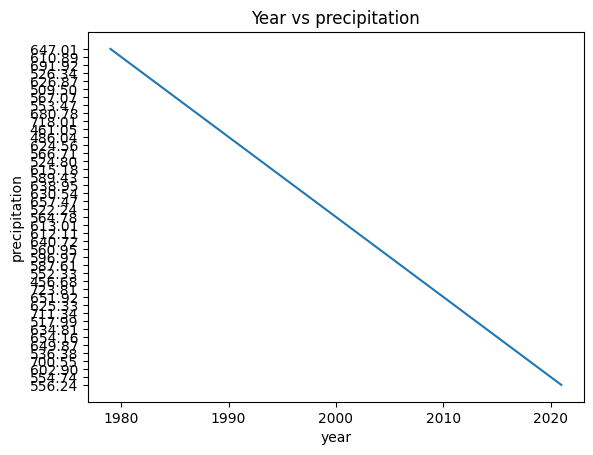

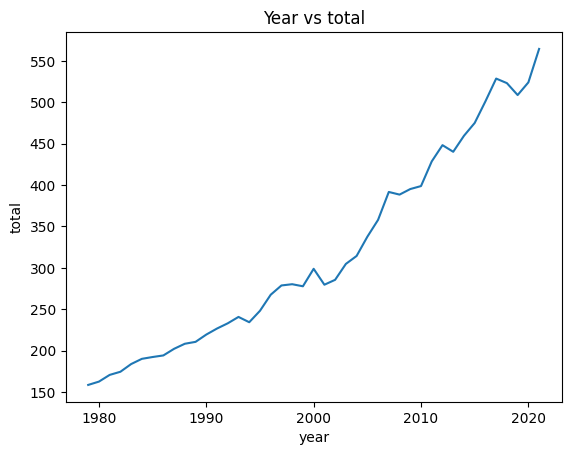

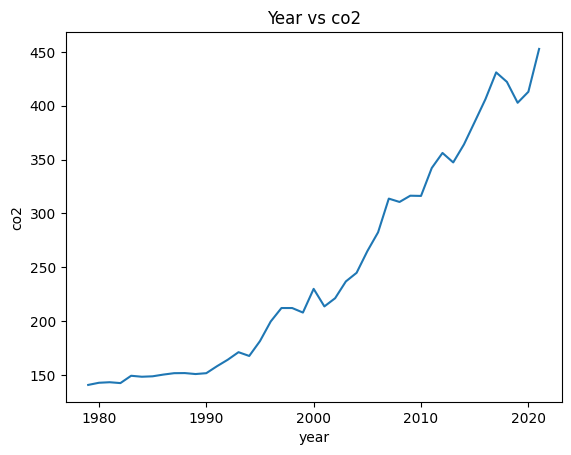

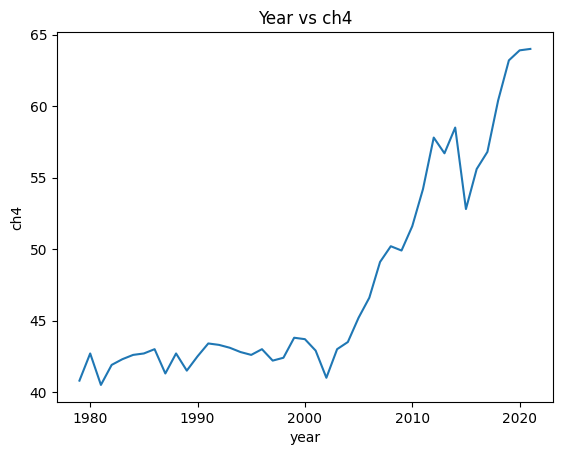

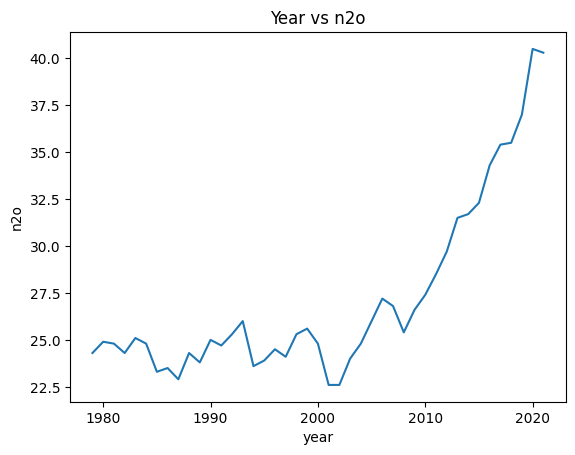

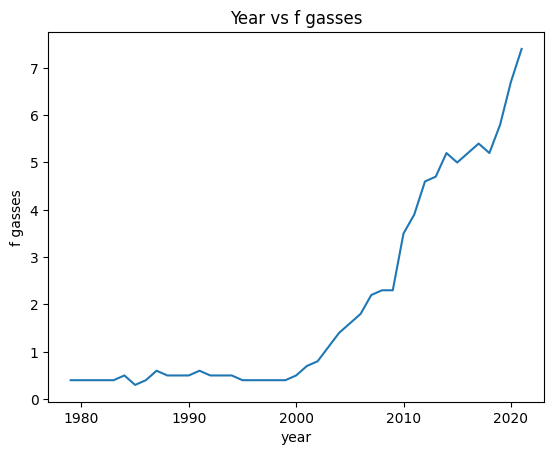

In [131]:
features = ['crop number', 'crop area', 'crop production', 'average_temp',
            'min_temp', 'max_temp', 'drought_idx', 'precipitation', 
            'total', 'co2', 'ch4', 'n2o', 'f gasses']


plt.figure(figsize=(15,10))

for feature in features:
    plt.figure()
    sns.lineplot(data=main_df, x='year', y=feature)
    plt.title(f'Year vs {feature}')
    plt.show()
    print("\n\n")

### Crop Production

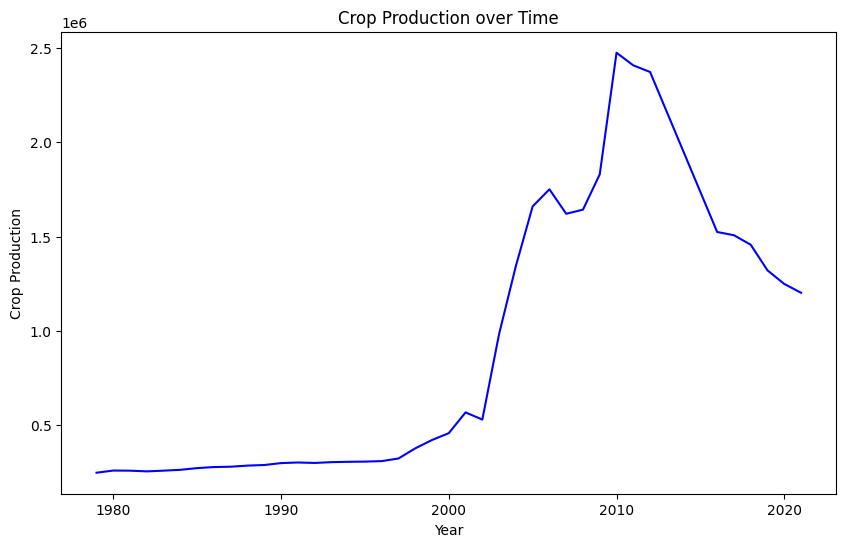

In [132]:
plt.figure(figsize=(10, 6))
plt.plot(main_df['year'], main_df['crop production'], color='blue')
plt.xlabel('Year')
plt.ylabel('Crop Production')
plt.title('Crop Production over Time')
plt.show()

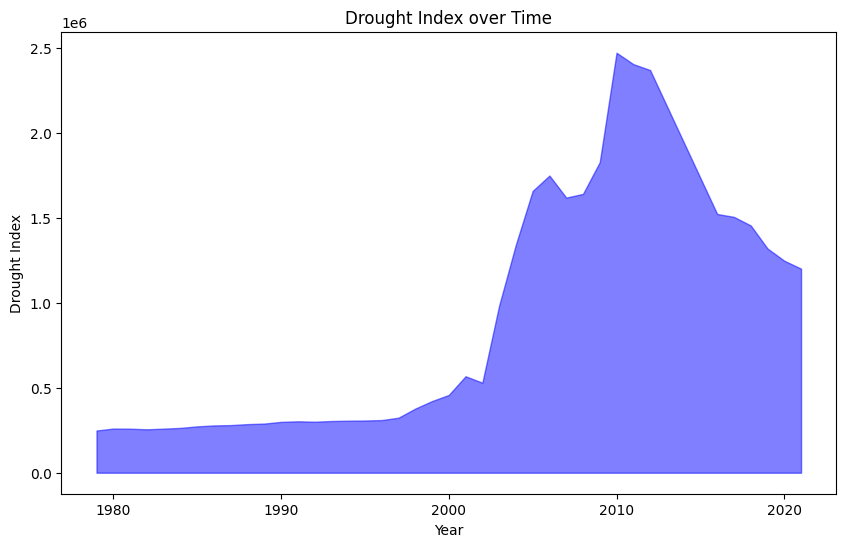

In [147]:
plt.figure(figsize=(10, 6))
plt.fill_between(main_df['year'], main_df['crop production'], color='blue', alpha=0.5)

plt.xlabel('Year')
plt.ylabel('Drought Index')
plt.title('Drought Index over Time')

plt.show()

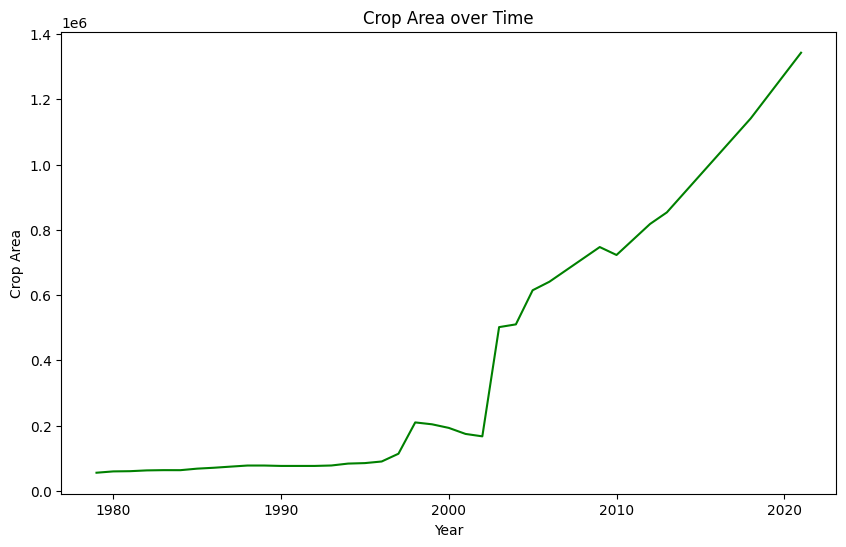

In [133]:
plt.figure(figsize=(10, 6))
plt.plot(main_df['year'], main_df['crop area'], color='green')
plt.xlabel('Year')
plt.ylabel('Crop Area')
plt.title('Crop Area over Time')
plt.show()

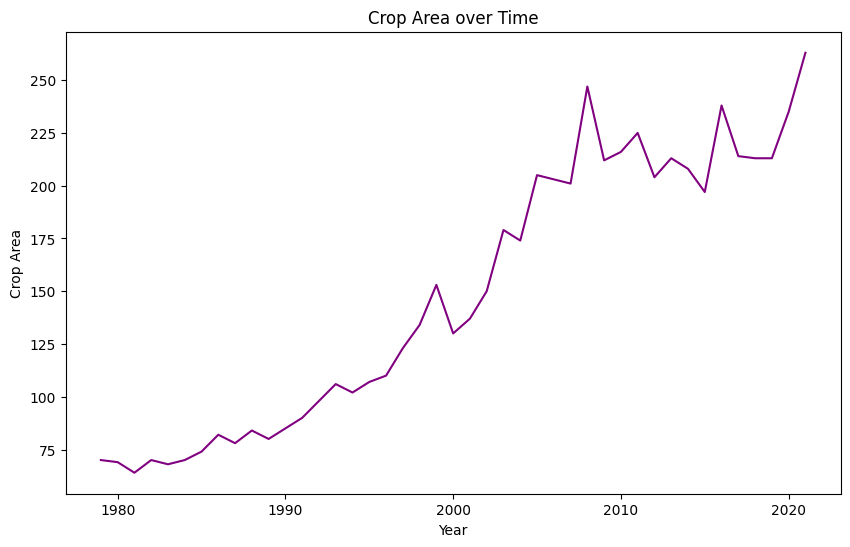

In [137]:
plt.figure(figsize=(10, 6))
plt.plot(main_df['year'], main_df['crop number'], color='purple')
plt.xlabel('Year')
plt.ylabel('Crop Area')
plt.title('Crop Area over Time')
plt.show()

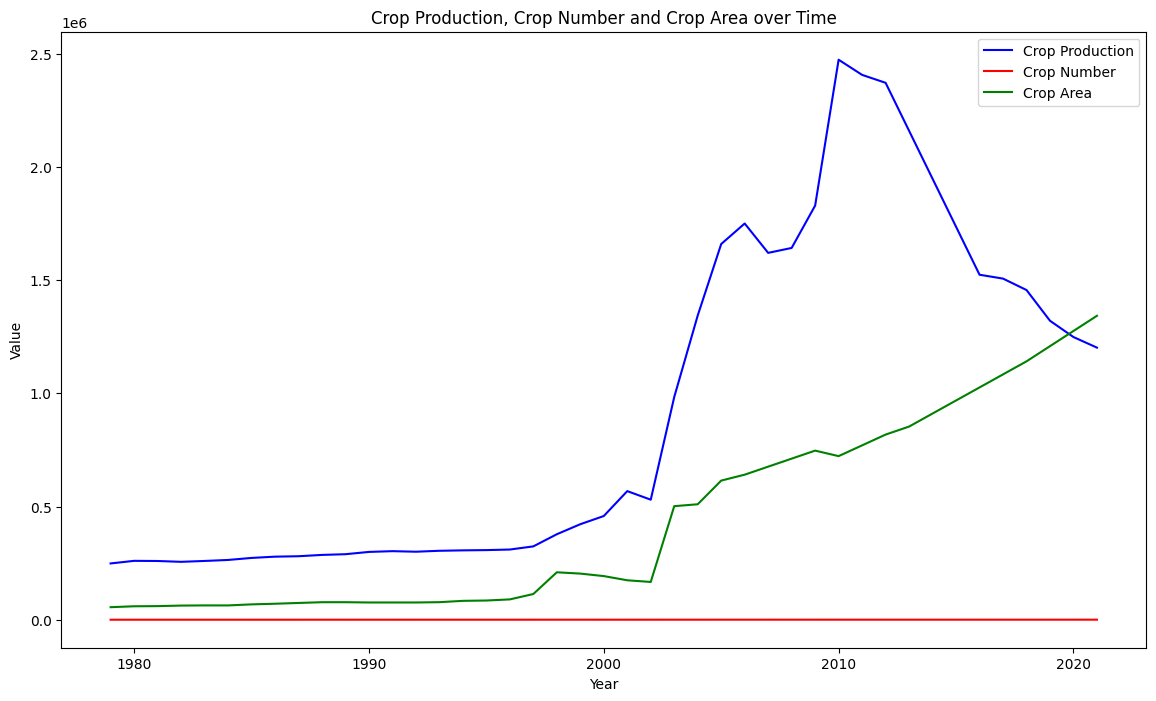

In [138]:
plt.figure(figsize=(14, 8))

plt.plot(main_df['year'], main_df['crop production'], label='Crop Production', color='blue')
plt.plot(main_df['year'], main_df['crop number'], label='Crop Number', color='red')
plt.plot(main_df['year'], main_df['crop area'], label='Crop Area', color='green')


plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Crop Production, Crop Number and Crop Area over Time')
plt.legend()


plt.show()

### Temperature

In these plots the change in tempeature in Turkey is examined. It can be seen that the average, min and max temperatures in Turkey is increasing over time and increasing faster in recent years.

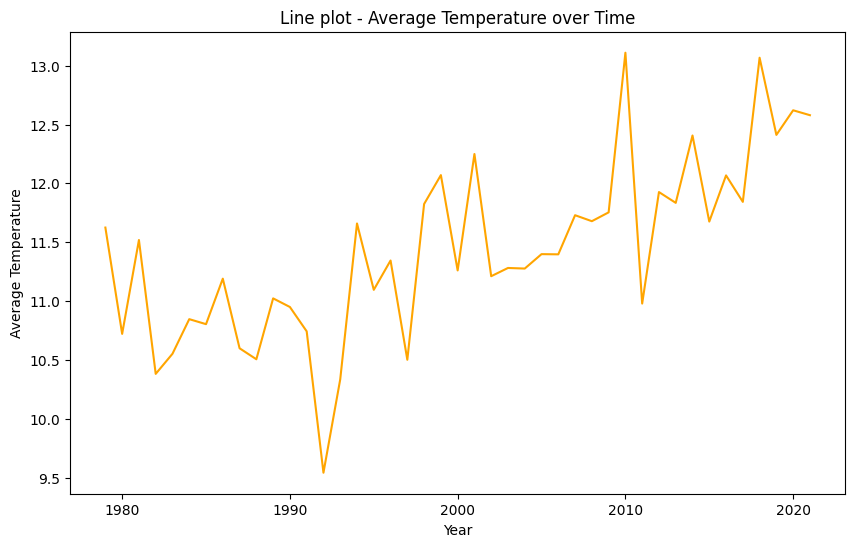

In [150]:
plt.figure(figsize=(10, 6))
plt.plot(main_df['year'], main_df['average_temp'], color='orange')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Line plot - Average Temperature over Time')
plt.show()

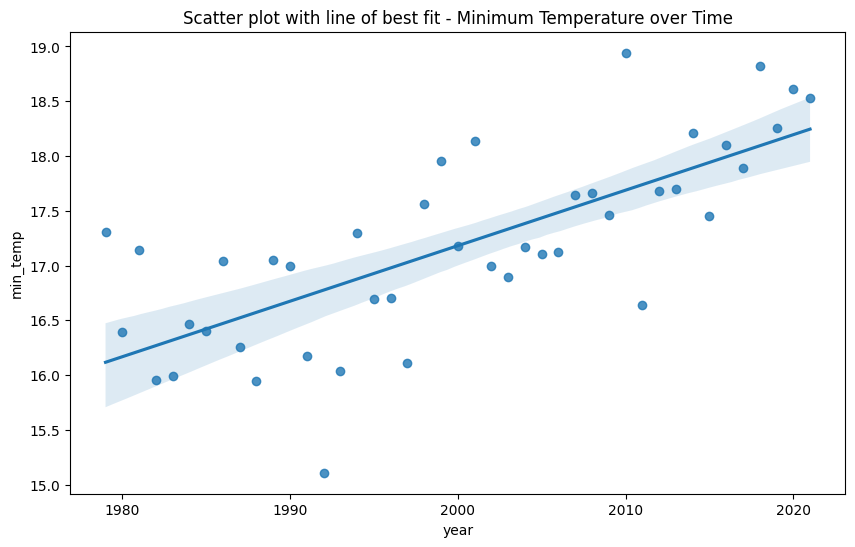

In [162]:
plt.figure(figsize=(10, 6))
sns.regplot(x='year', y='min_temp', data=main_df)
plt.title('Scatter plot with line of best fit - Minimum Temperature over Time')
plt.show()

 This plot is also showing that the trend of average temperature of Turkey is increasing over years. It can be seen clearly from thhe fitted line plotted on the observation data.

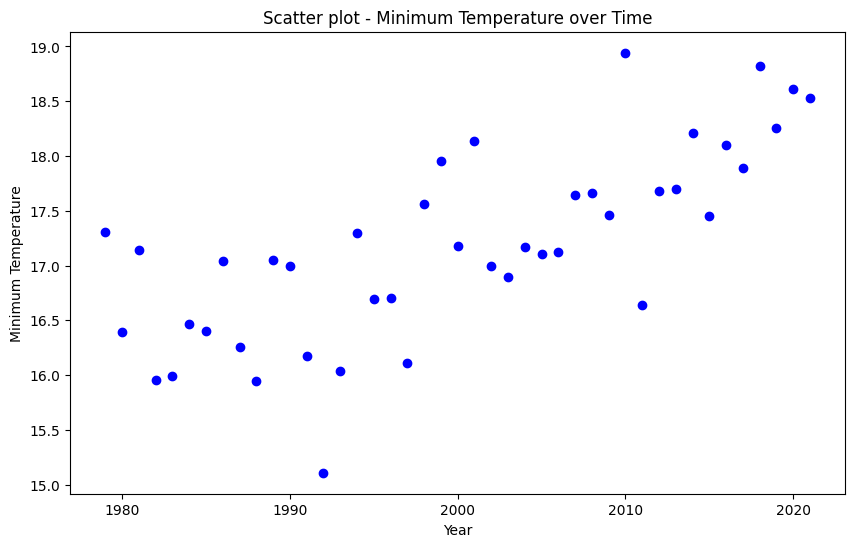

In [152]:
plt.figure(figsize=(10, 6))
plt.scatter(main_df['year'], main_df['min_temp'], color='blue')
plt.xlabel('Year')
plt.ylabel('Minimum Temperature')
plt.title('Scatter plot - Minimum Temperature over Time')
plt.show()


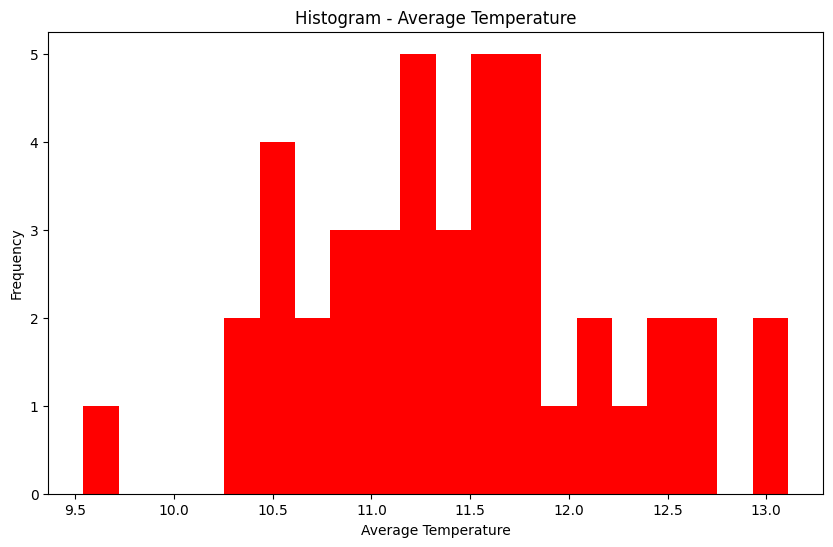

In [153]:
plt.figure(figsize=(10, 6))
plt.hist(main_df['average_temp'], bins=20, color='red')
plt.xlabel('Average Temperature')
plt.ylabel('Frequency')
plt.title('Histogram - Average Temperature')
plt.show()

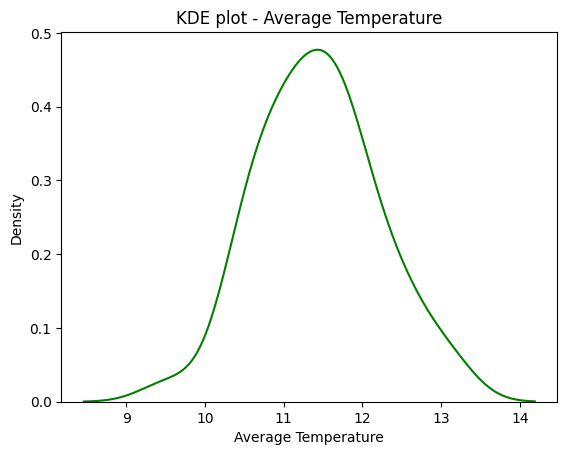

In [156]:
sns.kdeplot(main_df['average_temp'], color='green')
plt.xlabel('Average Temperature')
plt.ylabel('Density')
plt.title('KDE plot - Average Temperature')
plt.show()

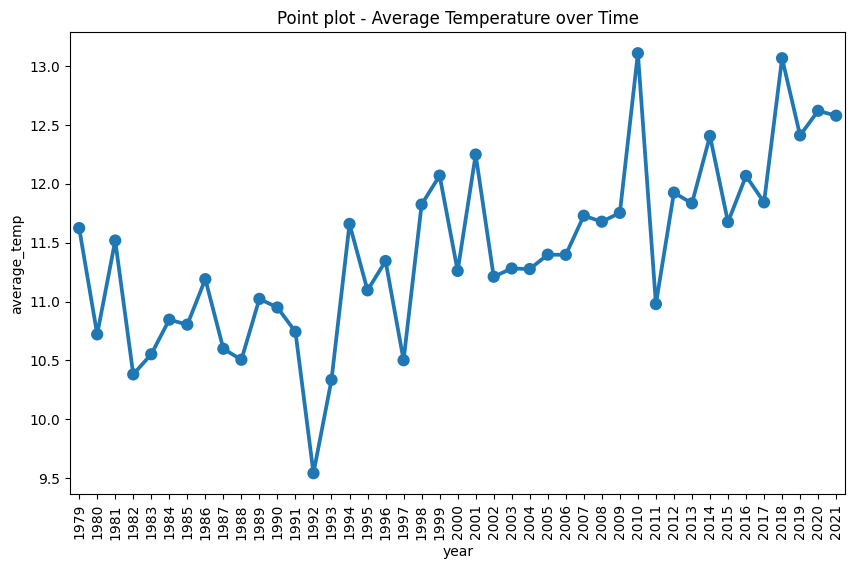

In [160]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='year', y='average_temp', data=main_df)
plt.title('Point plot - Average Temperature over Time')
plt.xticks(rotation=90)
plt.show()

This plot shows the temperature range in Turkey over time by showing the change of max and min temperatures in Turkey.

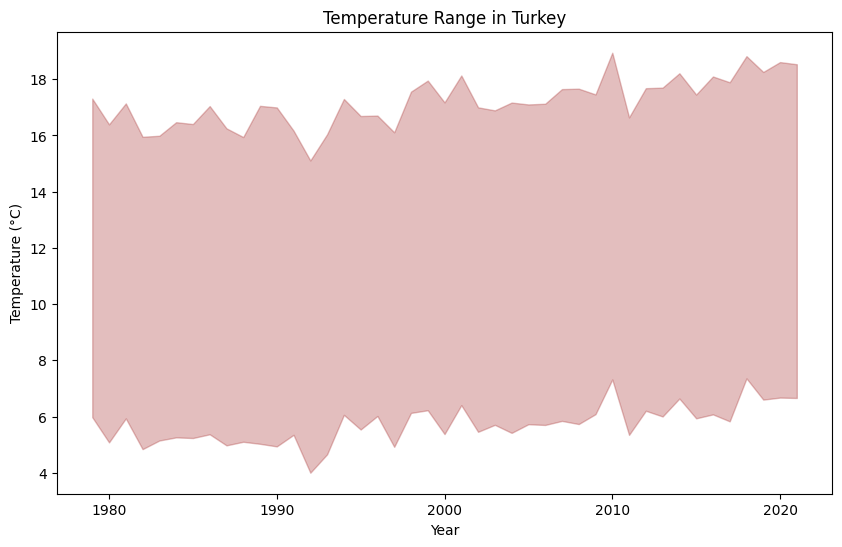

In [155]:
plt.figure(figsize=(10, 6))
plt.fill_between(main_df['year'], main_df['min_temp'], main_df['max_temp'], color='brown', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Range in Turkey')
plt.show()

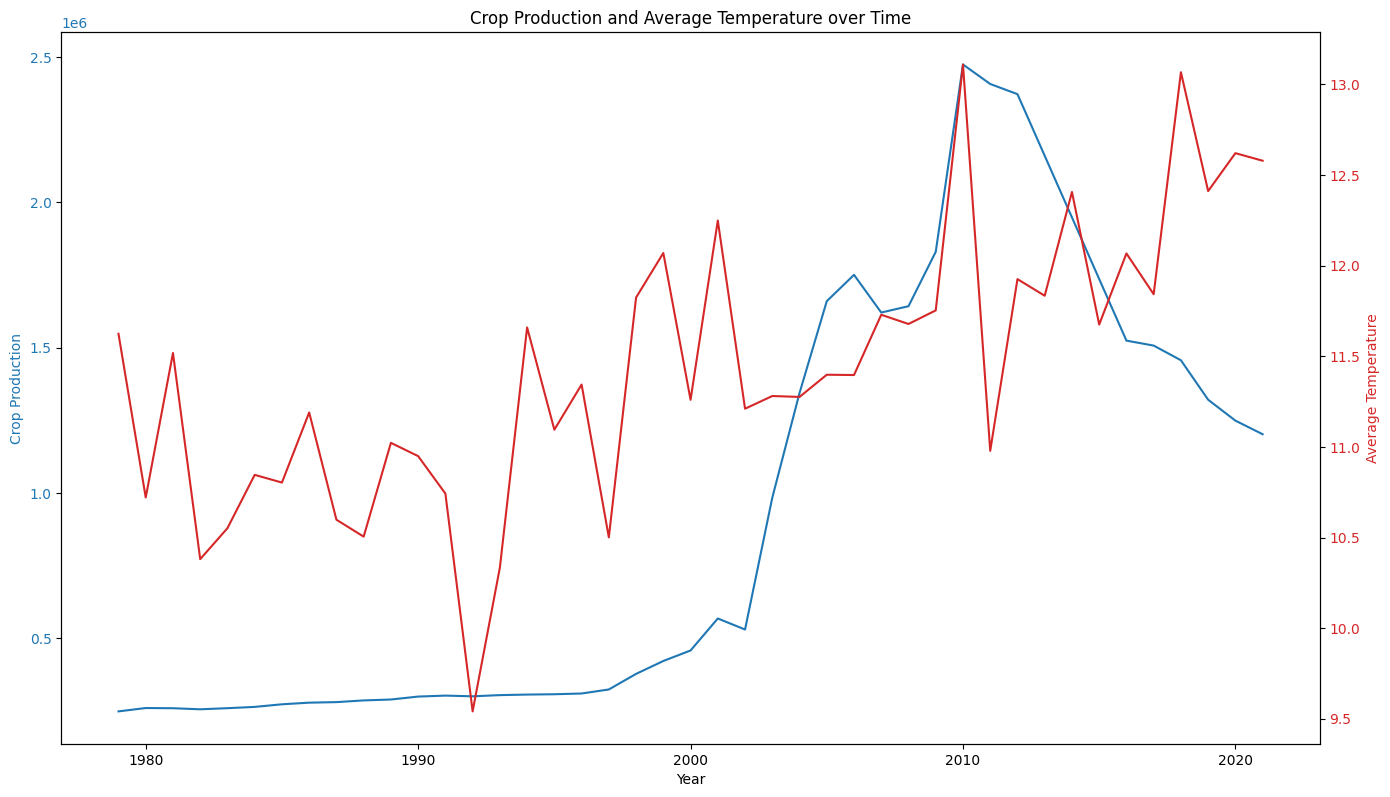

In [169]:
fig, ax1 = plt.subplots(figsize=(14, 8))

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Crop Production', color=color)
ax1.plot(main_df['year'], main_df['crop production'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:red'
ax2.set_ylabel('Average Temperature', color=color)
ax2.plot(main_df['year'], main_df['average_temp'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Crop Production and Average Temperature over Time')
plt.show()

In this plot, it can be seen that while the temperatures are increasing in Turkey, also the drought in incrasing.

### Drought Index

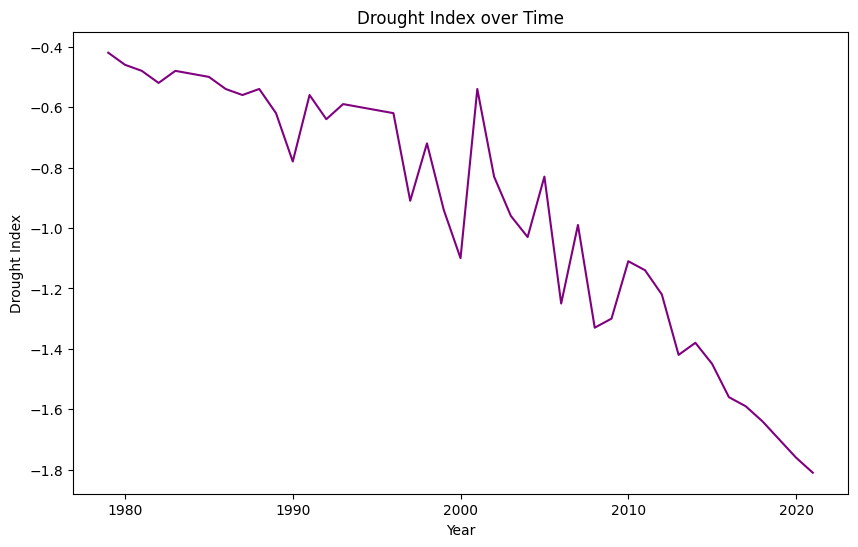

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(main_df['year'], main_df['drought_idx'], color='purple')

plt.xlabel('Year')
plt.ylabel('Drought Index')
plt.title('Drought Index over Time')

plt.show()

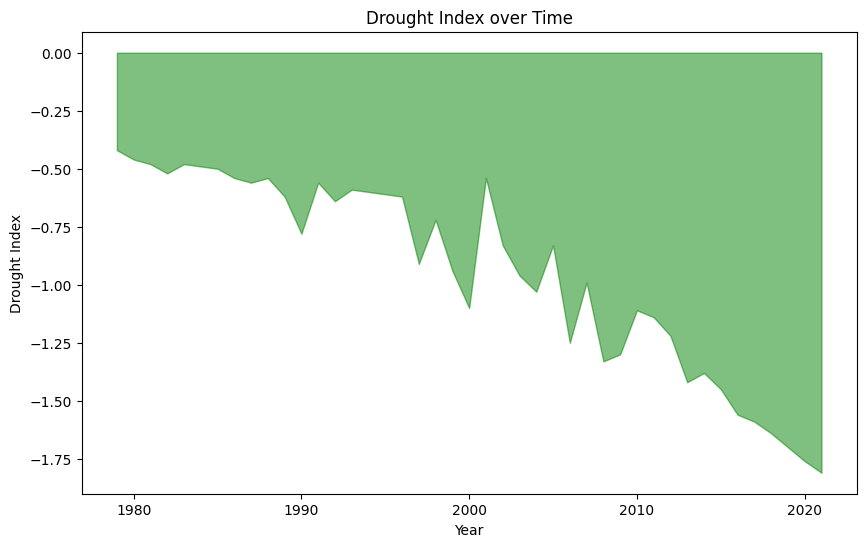

In [145]:
plt.figure(figsize=(10, 6))
plt.fill_between(main_df['year'], main_df['drought_idx'], color='green', alpha=0.5)

plt.xlabel('Year')
plt.ylabel('Drought Index')
plt.title('Drought Index over Time')

plt.show()

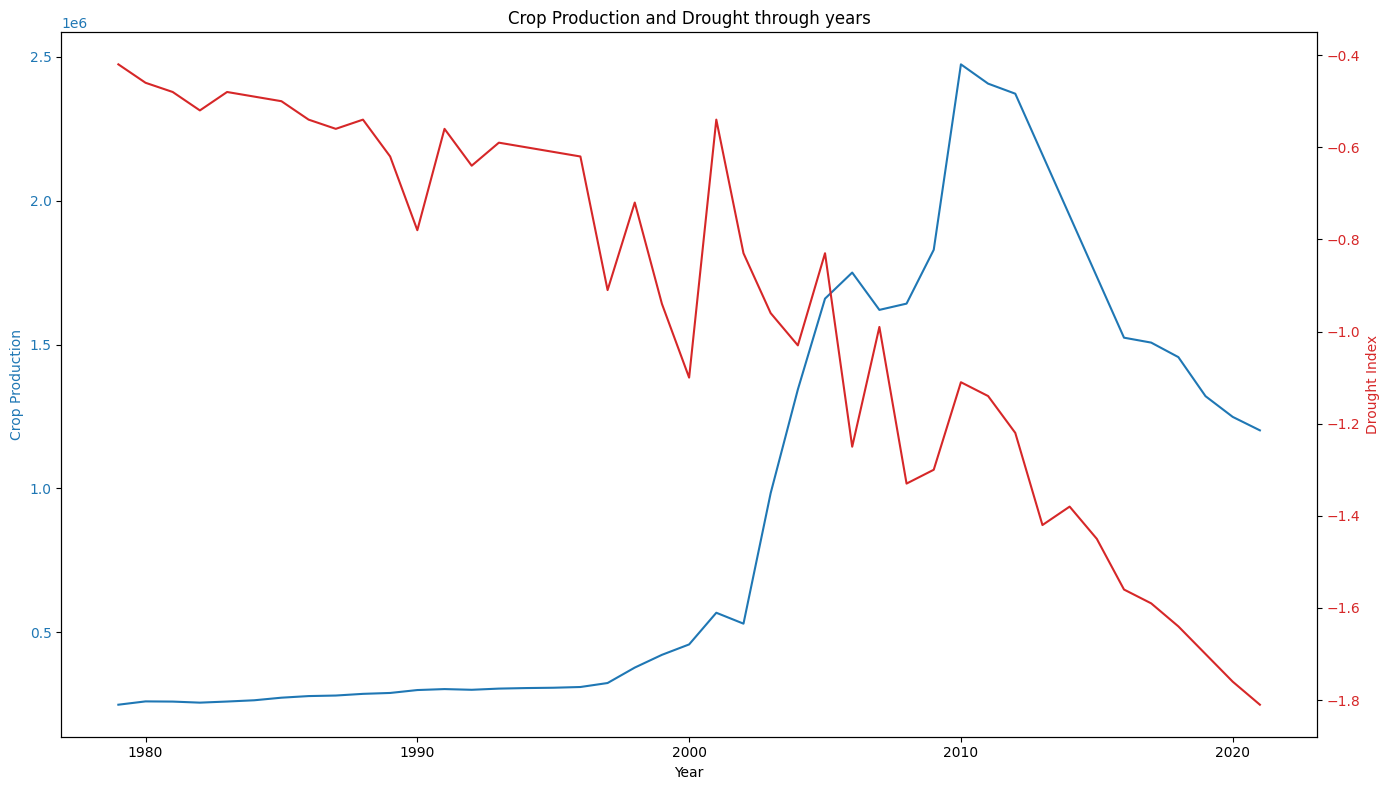

In [149]:
fig, ax1 = plt.subplots(figsize=(14, 8))

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Crop Production', color=color)
ax1.plot(main_df['year'], main_df['crop production'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Drought Index', color=color)  
ax2.plot(main_df['year'], main_df['drought_idx'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Crop Production and Drought through years")

fig.tight_layout()  
plt.show()

### Precipitation

In this section precipitation in Turkey is plotted over time. From the plots, it can be said that the general trend in measurements is not changing.


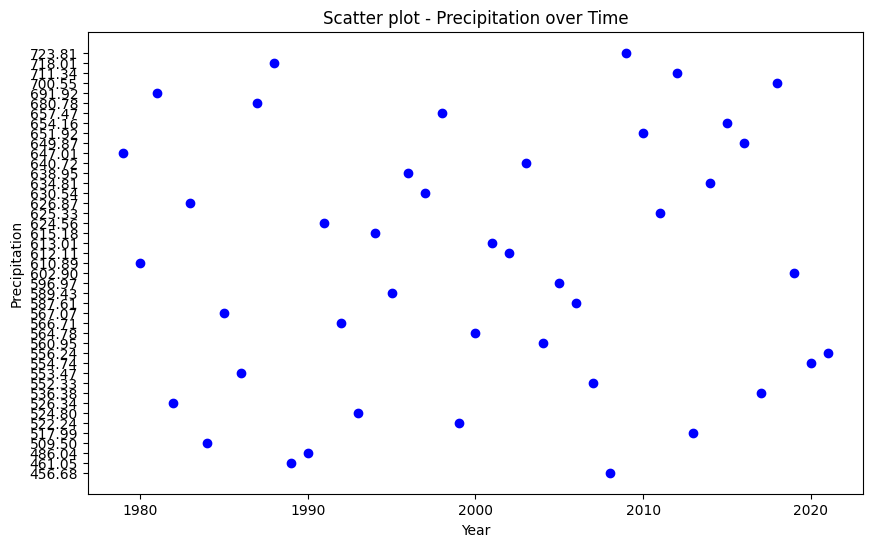

In [176]:
main_df = main_df.sort_values('precipitation')

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(main_df['year'], main_df['precipitation'], color='blue')
plt.xlabel('Year')
plt.ylabel('Precipitation')
plt.title('Scatter plot - Precipitation over Time')
plt.show()

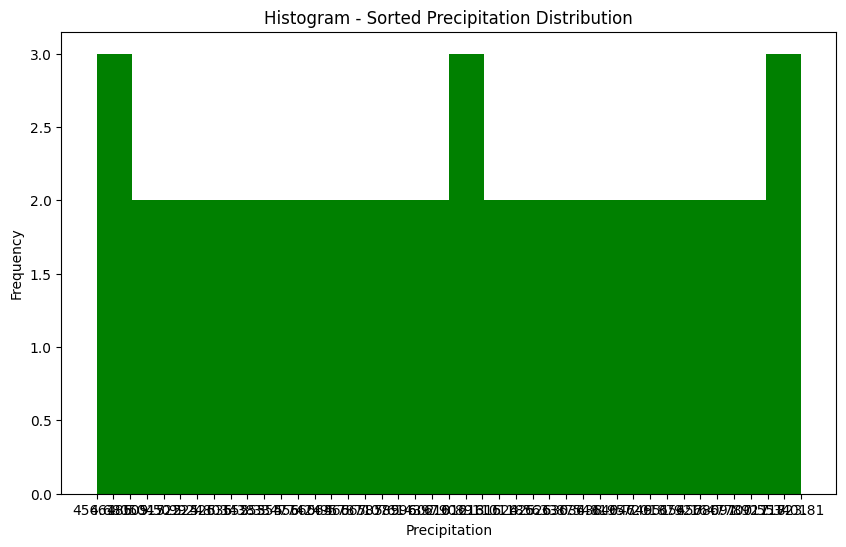

In [177]:
plt.figure(figsize=(10, 6))
plt.hist(main_df['precipitation'], bins=20, color='green')
plt.xlabel('Precipitation')
plt.ylabel('Frequency')
plt.title('Histogram - Sorted Precipitation Distribution')
plt.show()

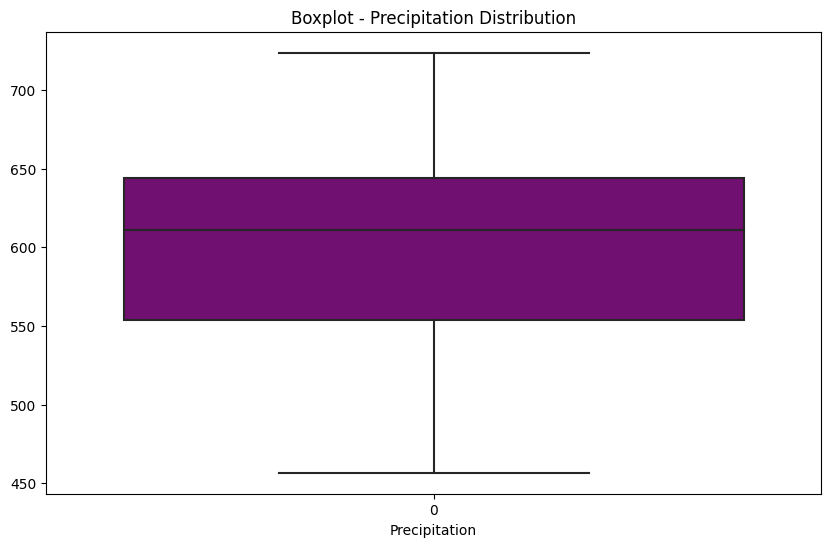

In [172]:
plt.figure(figsize=(10, 6))
sns.boxplot(main_df['precipitation'], color='purple')
plt.xlabel('Precipitation')
plt.title('Boxplot - Precipitation Distribution')
plt.show()

### Water Sources


In this section, water usage and population served by water is plotted. It can be also seen that the water usage and consumption is incrasing over time while drought in Turkey is increasing.

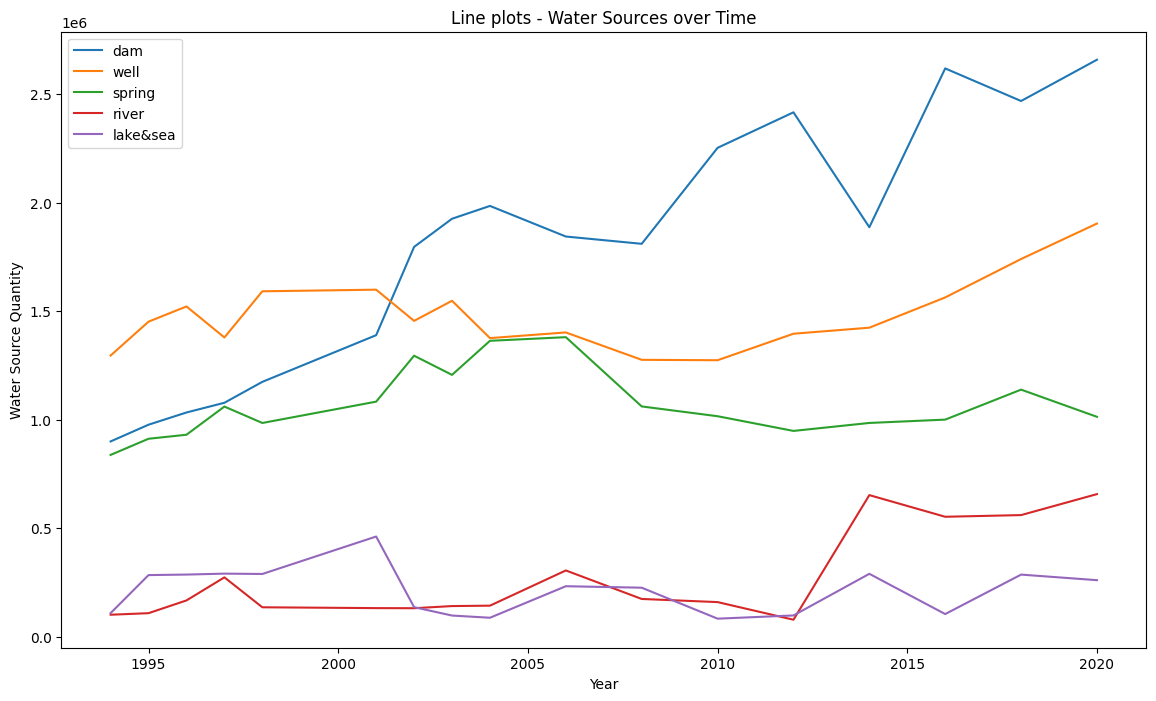

In [245]:
plt.figure(figsize=(14, 8))
for column in ['dam', 'well', 'spring', 'river', 'lake&sea']:
    plt.plot(water_sources_df['year'], water_sources_df[column], label=column)
plt.xlabel('Year')
plt.ylabel('Water Source Quantity')
plt.title('Line plots - Water Sources over Time')
plt.legend()
plt.show()


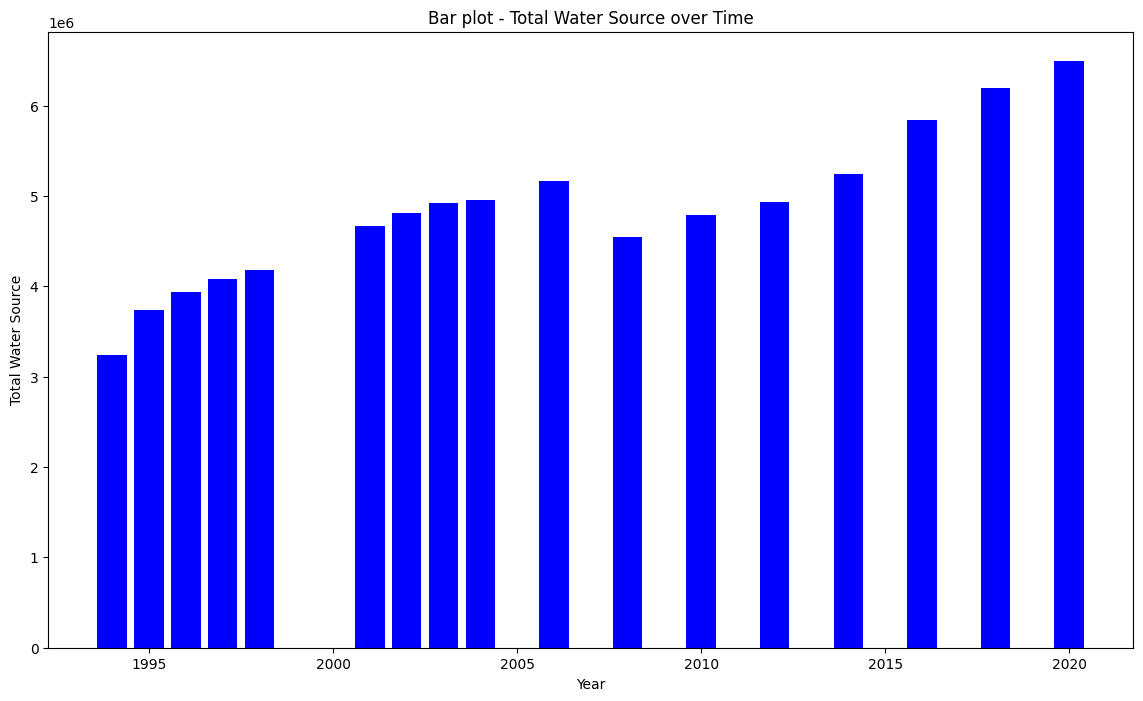

In [246]:
plt.figure(figsize=(14, 8))
plt.bar(water_sources_df['year'], water_sources_df['total water source'], color='blue')
plt.xlabel('Year')
plt.ylabel('Total Water Source')
plt.title('Bar plot - Total Water Source over Time')
plt.show()

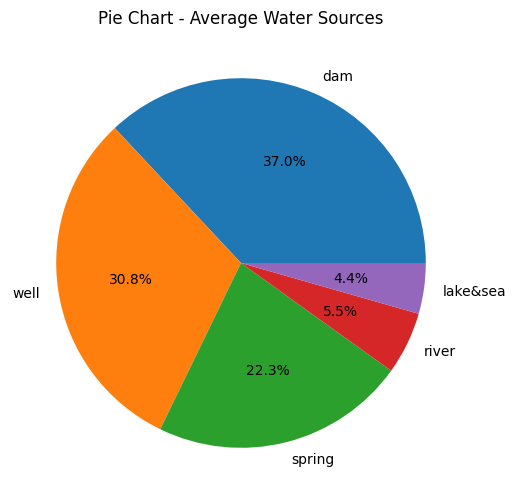

In [247]:
avg_water_sources = water_sources_df[['dam', 'well', 'spring', 'river', 'lake&sea']].mean()
plt.figure(figsize=(10, 6))
plt.pie(avg_water_sources, labels=avg_water_sources.index, autopct='%1.1f%%')
plt.title('Pie Chart - Average Water Sources')
plt.show()

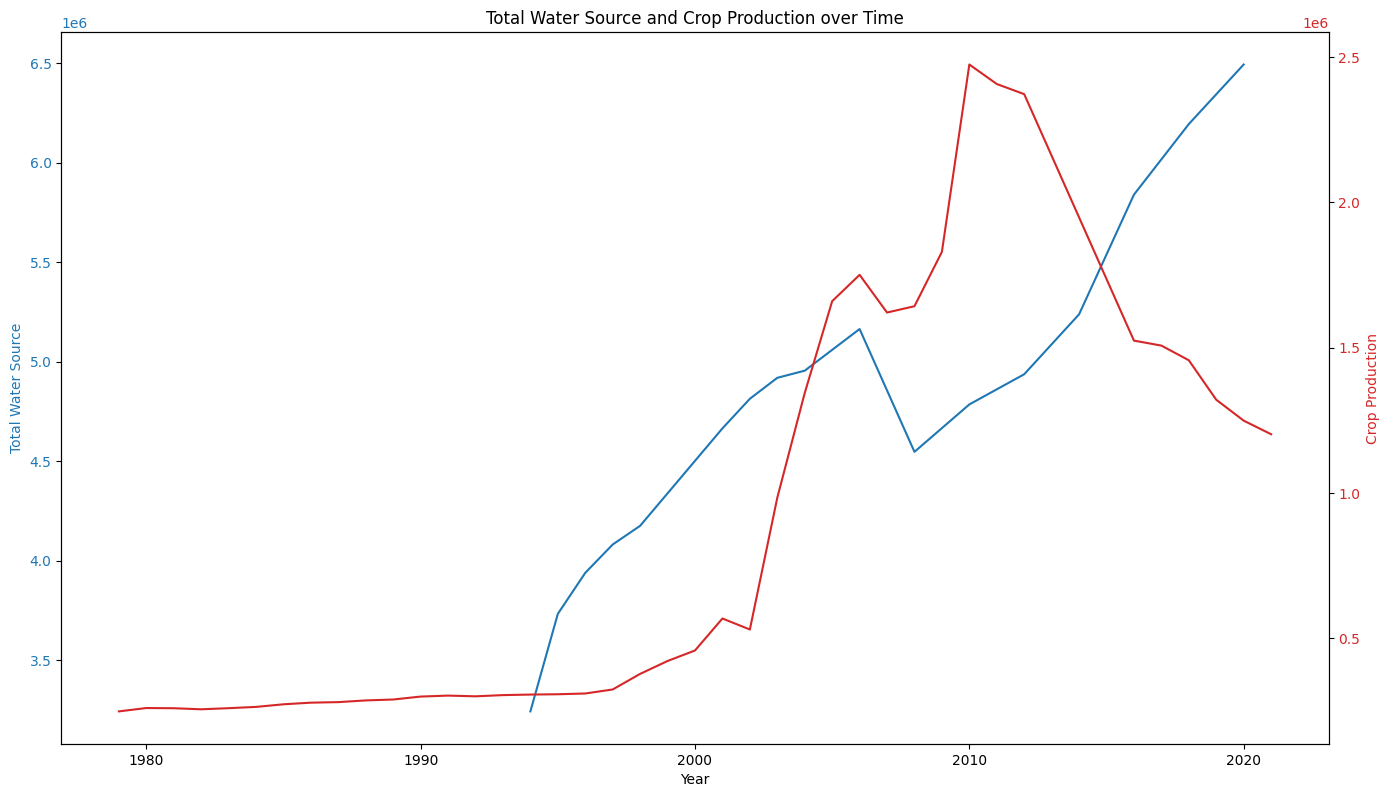

In [248]:
fig, ax1 = plt.subplots(figsize=(14, 8))

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Water Source', color=color)
ax1.plot(water_sources_df['year'], water_sources_df['total water source'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('Crop Production', color=color)
ax2.plot(main_df['year'], main_df['crop production'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Total Water Source and Crop Production over Time')
plt.show()

### Greenhouse Gas Emissions

In this section, the change in greenhouse gas emissions are plotted over time. It can be seen that the CO2 and total greenhouse gas emissions were increased over time in Turkey.

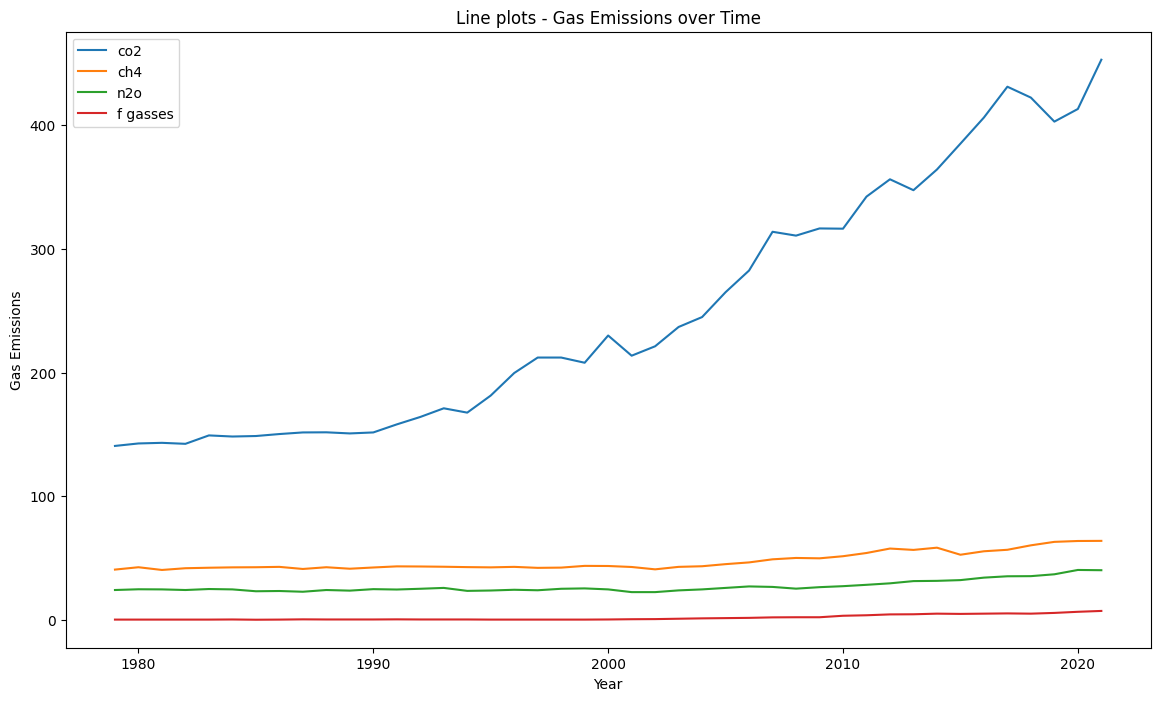

In [249]:
plt.figure(figsize=(14, 8))
for column in ['co2', 'ch4', 'n2o', 'f gasses']:
    plt.plot(main_df['year'], main_df[column], label=column)
plt.xlabel('Year')
plt.ylabel('Gas Emissions')
plt.title('Line plots - Gas Emissions over Time')
plt.legend()
plt.show()

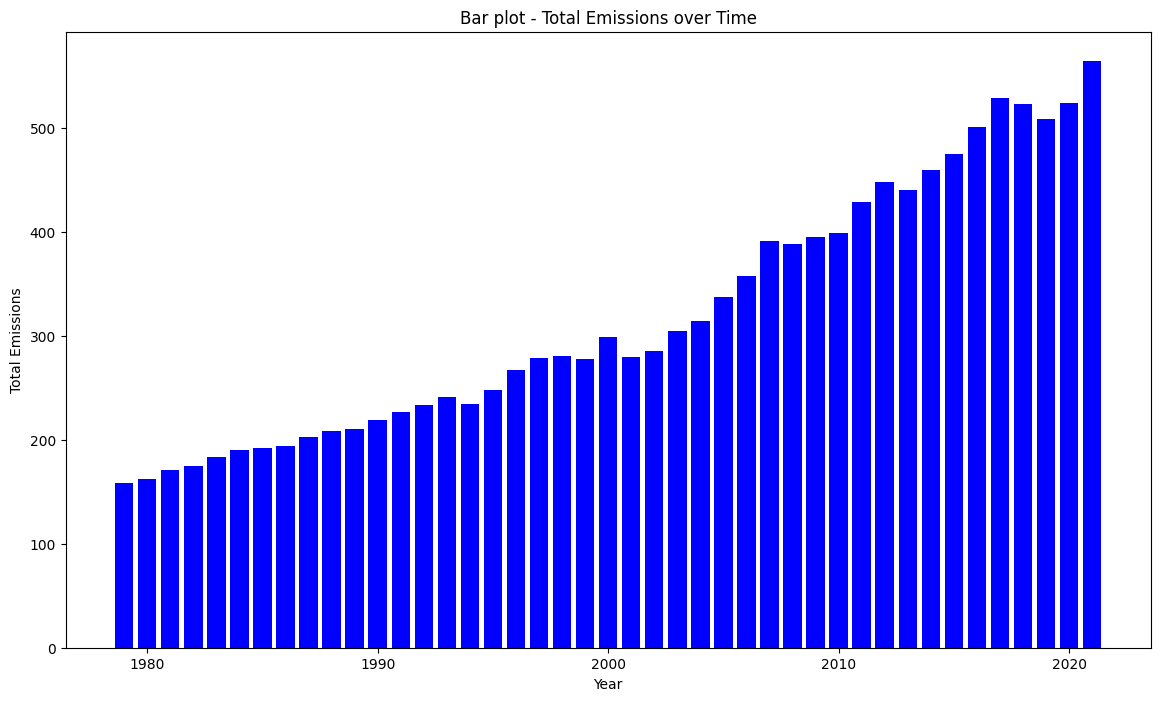

In [250]:
plt.figure(figsize=(14, 8))
plt.bar(main_df['year'], main_df['total'], color='blue')
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.title('Bar plot - Total Emissions over Time')
plt.show()

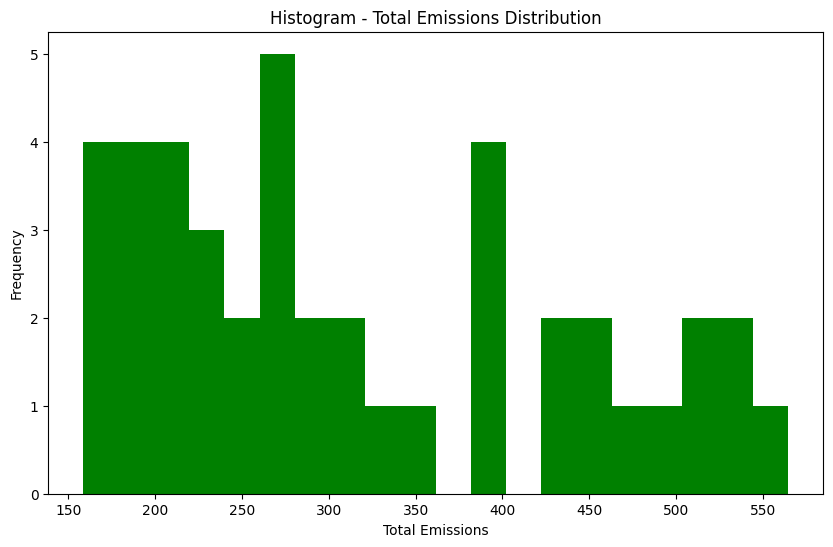

In [251]:
plt.figure(figsize=(10, 6))
plt.hist(main_df['total'], bins=20, color='green')
plt.xlabel('Total Emissions')
plt.ylabel('Frequency')
plt.title('Histogram - Total Emissions Distribution')
plt.show()

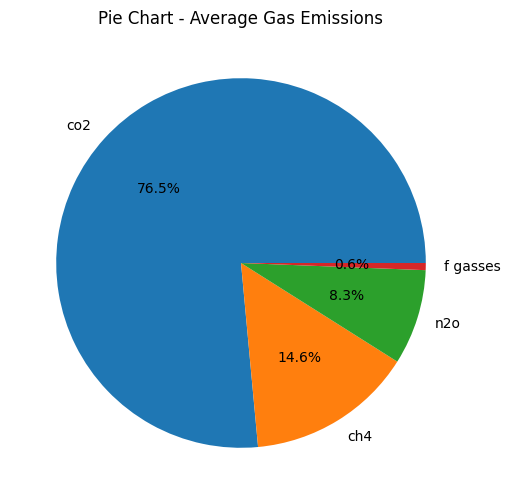

In [252]:
avg_emissions = main_df[['co2', 'ch4', 'n2o', 'f gasses']].mean()
plt.figure(figsize=(10, 6))
plt.pie(avg_emissions, labels=avg_emissions.index, autopct='%1.1f%%')
plt.title('Pie Chart - Average Gas Emissions')
plt.show()

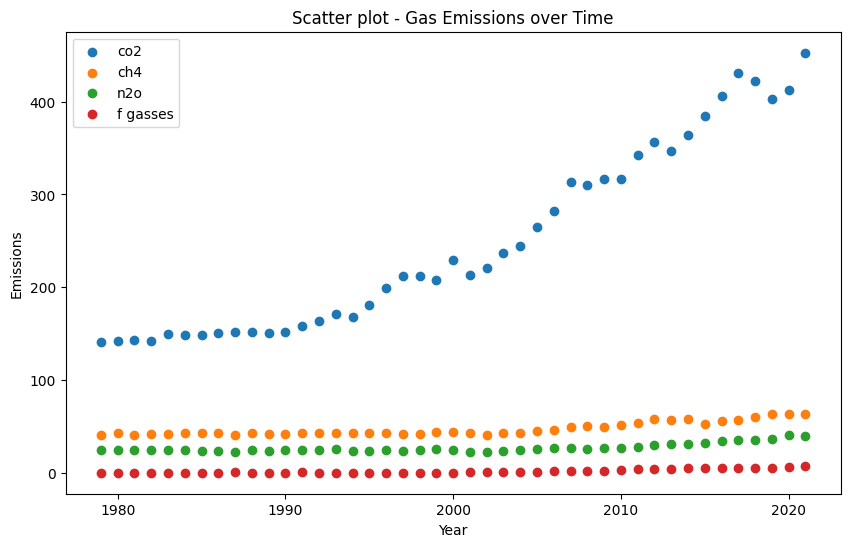

In [253]:
plt.figure(figsize=(10, 6))
for column in ['co2', 'ch4', 'n2o', 'f gasses']:
    plt.scatter(main_df['year'], main_df[column], label=column)
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.title('Scatter plot - Gas Emissions over Time')
plt.legend()
plt.show()

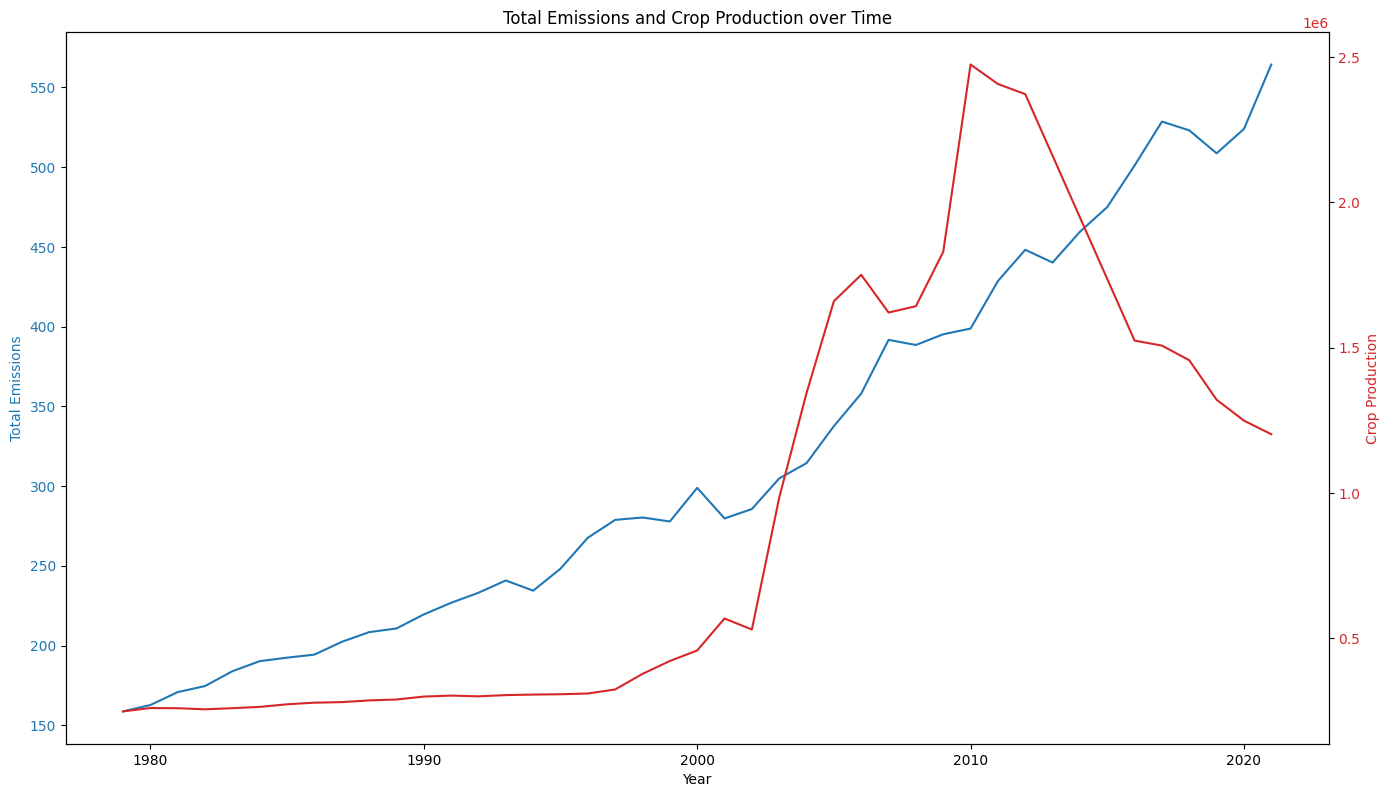

In [254]:
fig, ax1 = plt.subplots(figsize=(14, 8))

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Emissions', color=color)
ax1.plot(main_df['year'], main_df['total'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('Crop Production', color=color)
ax2.plot(main_df['year'], main_df['crop production'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Total Emissions and Crop Production over Time')
plt.show()

### General Comparison Visulizations

In this section the relation between drought and other parameters are examined with different types of graphs and features.

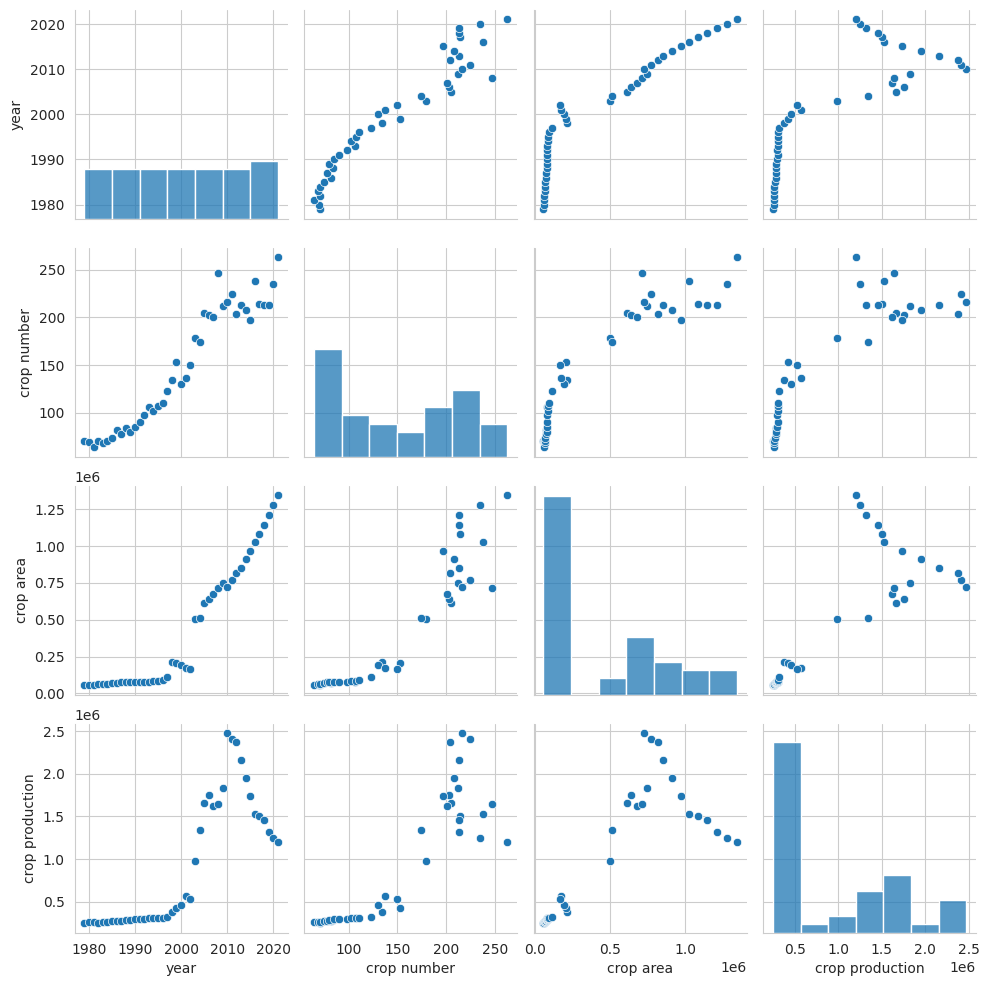

In [262]:
sns.set_style("whitegrid")
sns.pairplot(main_df[['year', 'crop number', 'crop area', 'crop production']])
plt.show()

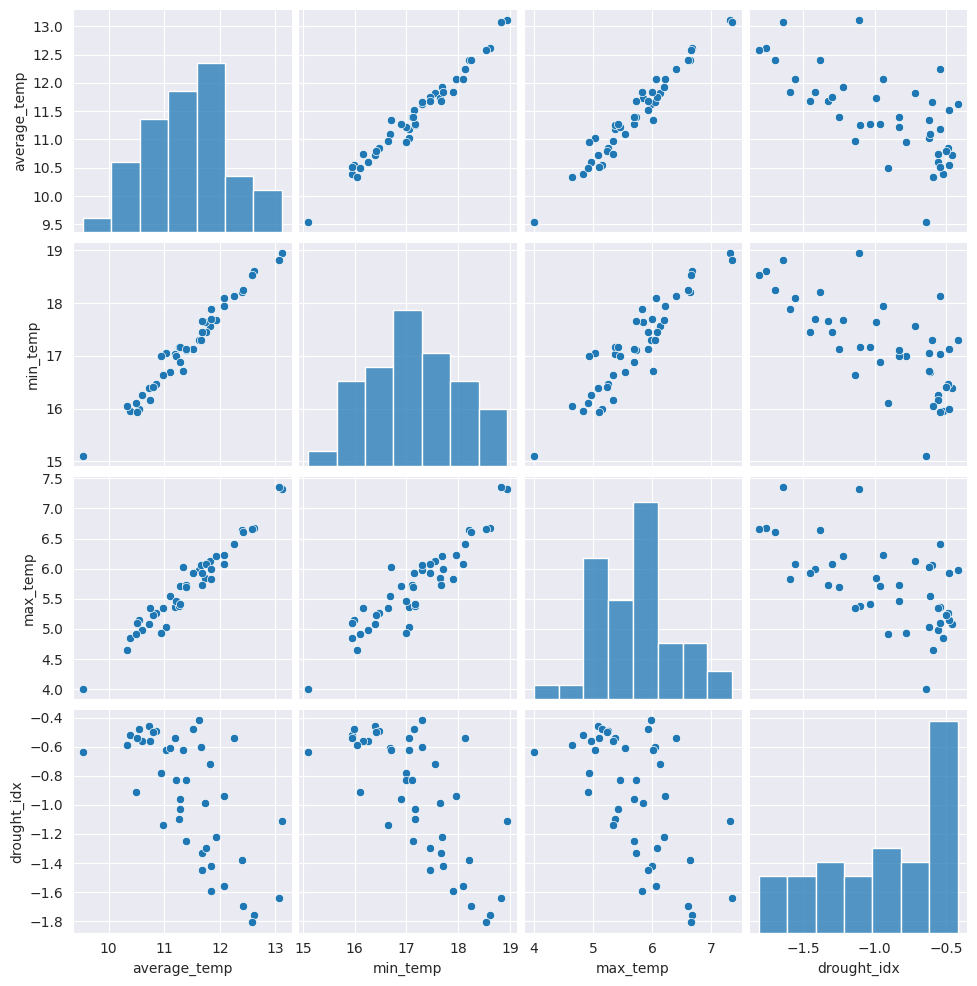

In [263]:
sns.set_style("darkgrid")
sns.pairplot(main_df[['average_temp', 'min_temp', 'max_temp', 'drought_idx']])
plt.show()

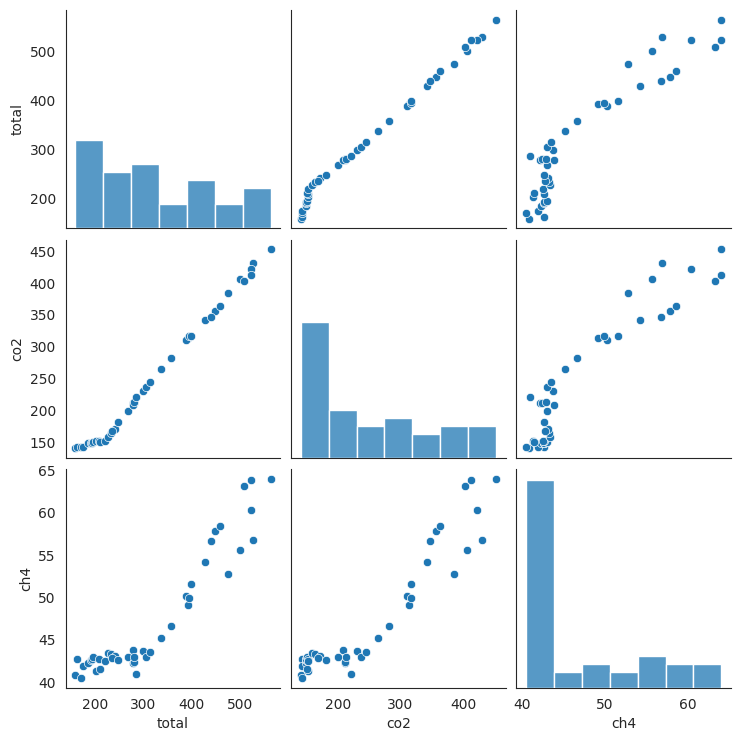

In [264]:
sns.set_style("white")
sns.pairplot(main_df[['precipitation', 'total', 'co2', 'ch4']])
plt.show()

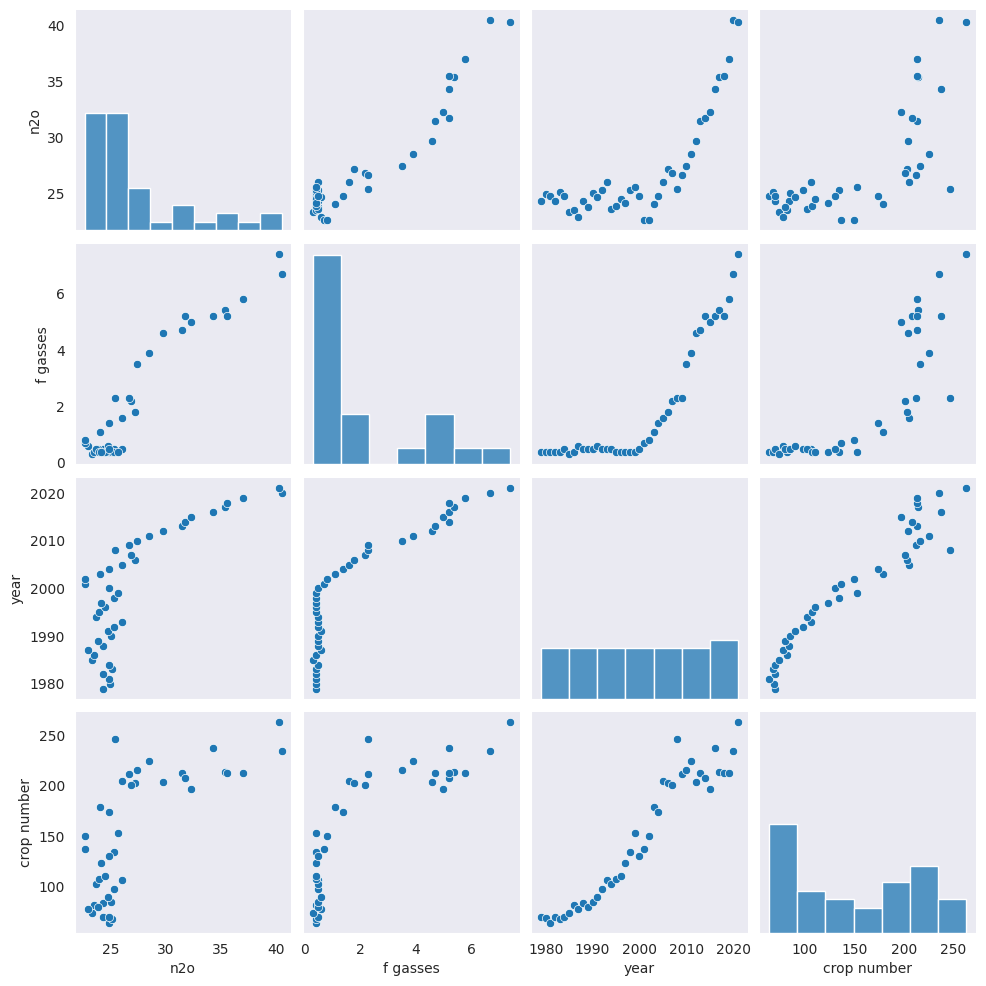

In [265]:
sns.set_style("dark")
sns.pairplot(main_df[['n2o', 'f gasses', 'year', 'crop number']])
plt.show()


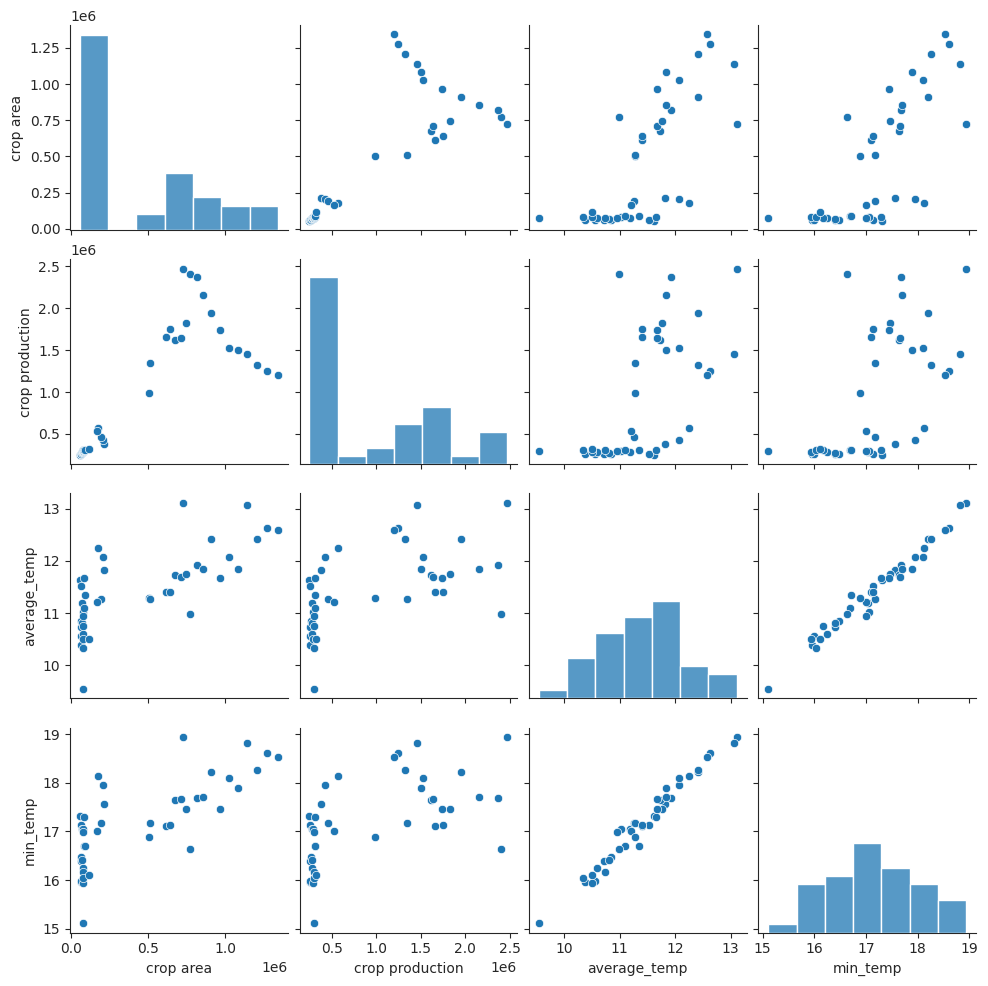

In [266]:
sns.set_style("ticks")
sns.pairplot(main_df[['crop area', 'crop production', 'average_temp', 'min_temp']])
plt.show()

## Correlation Calculations

In this section, we explore the linear and nonlinear correlations between drought and other features in the dataset. Based on our analysis, we observe that the correlation between crop production and precipitation is relatively low. However, we note that there is a strong correlation between crop production and average temperature, greenhouse gas emissions, as well as drought. These findings suggest that these variables play a significant role in influencing crop production.

In [273]:
correlations = {}

for col in main_df.columns:
    if col != 'crop production' and col != 'precipitation':
        pearson_corr = main_df[col].corr(main_df['crop production'], method='pearson')
        spearman_corr = main_df[col].corr(main_df['crop production'], method='spearman')
        correlations[col] = {"Pearson": pearson_corr, "Spearman": spearman_corr}

correlations_df = pd.DataFrame(correlations).T

print("Correlation of features and Crop Production (excluding Precipitation):")

correlations_df

Correlation of features and Crop Production (excluding Precipitation):


,Pearson,Spearman
year,0.810615,0.892631
crop number,0.874896,0.906344
crop area,0.815766,0.886531
average_temp,0.585978,0.643159
min_temp,0.592870,0.632135
max_temp,0.551231,0.572637
drought_idx,-0.747353,-0.840257
total,0.806631,0.892480
co2,0.815552,0.892245
ch4,0.731307,0.794668



To visualize the correlation between each feature in the dataset, we can create a heatmap. The heatmap provides a graphical representation of the correlation matrix, allowing us to easily identify patterns and relationships between different variables.

<ipython-input-267-790455df2ef6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = main_df.corr()


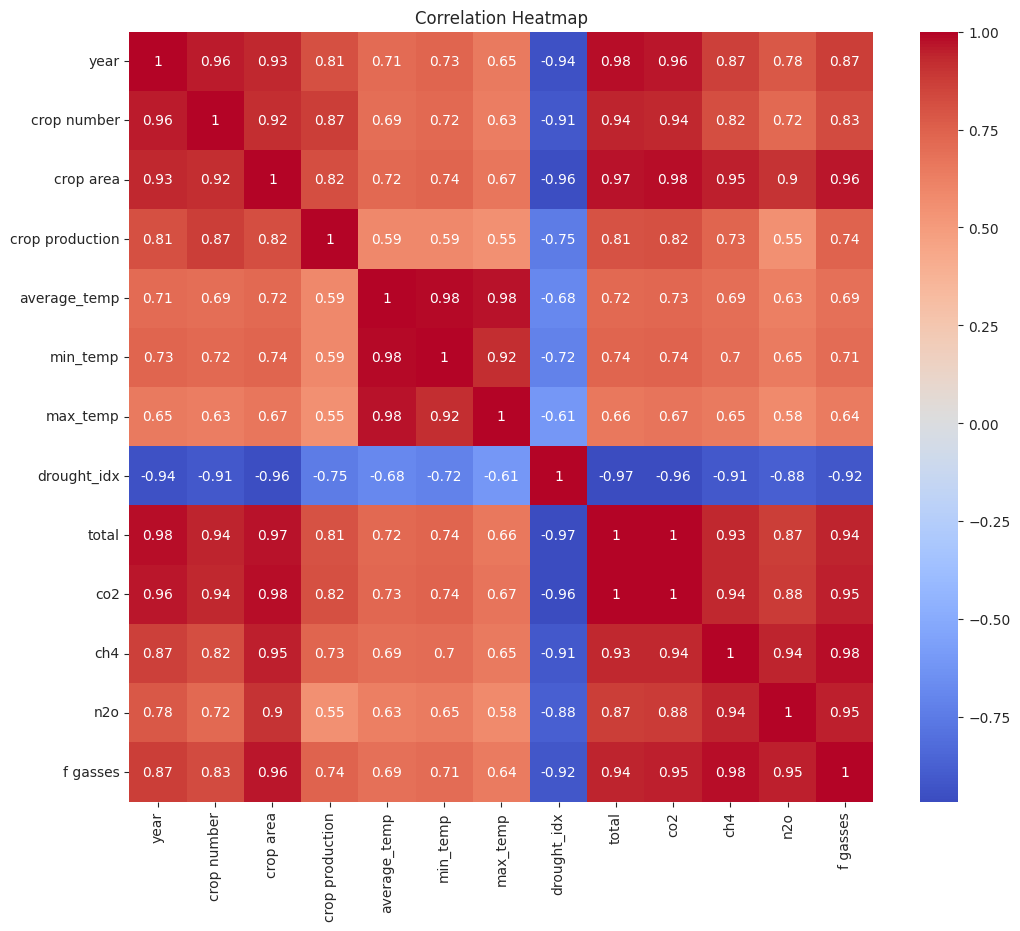

In [267]:
plt.figure(figsize=(12, 10)) 
corr = main_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Hypothesis Testing

In this part hypothesis testing is done for the given hypothesis below.

In [323]:
import scipy.stats as stats

selected_features = ['average_temp', 'min_temp', 'max_temp', 'drought_idx','total']

for feature in selected_features:
    print(f"\nHypothesis testing for {feature}:")
    print("Null Hypothesis (H0): The feature has no effect on crop production")
    print("Alternate Hypothesis (Ha): The feature has an effect on crop production")
    
    t_stat, p_value = stats.ttest_ind(main_df['crop production'], main_df[feature], alternative='two-sided', nan_policy='omit')
    
    print("t-statistic:", t_stat)
    print("p-value:", p_value)
    
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis. The feature has a significant effect on crop production.")
    else:
        print("Fail to reject the null hypothesis. The feature does not have a significant effect on crop production.")


Hypothesis testing for average_temp:
Null Hypothesis (H0): The feature has no effect on crop production
Alternate Hypothesis (Ha): The feature has an effect on crop production
t-statistic: 8.180069384548096
p-value: 2.643214815833404e-12
Reject the null hypothesis. The feature has a significant effect on crop production.

Hypothesis testing for min_temp:
Null Hypothesis (H0): The feature has no effect on crop production
Alternate Hypothesis (Ha): The feature has an effect on crop production
t-statistic: 8.180018763768702
p-value: 2.6438327589468946e-12
Reject the null hypothesis. The feature has a significant effect on crop production.

Hypothesis testing for max_temp:
Null Hypothesis (H0): The feature has no effect on crop production
Alternate Hypothesis (Ha): The feature has an effect on crop production
t-statistic: 8.180119695793893
p-value: 2.6426007940743185e-12
Reject the null hypothesis. The feature has a significant effect on crop production.

Hypothesis testing for drought_id

# Predictions

After completing the exploratory data analysis, we proceed with the prediction of the data using machine learning algorithms.

## Machine Learning

In [303]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate

### Data Partitioning

To prepare the dataset for machine learning, we exclude the 'year' and 'crop production' columns to obtain the features for the dataset. The 'crop production' values are selected as the labels for prediction.

The next step in setting up a model is to train the data by splitting it into training and testing sets. This step is crucial in determining the division rate, as it can affect the model's performance. In this case, a division rate of 0.2 (or 20%) is chosen using the train_test_split function.

In [277]:
main_df.columns

Index(['year', 'crop number', 'crop area', 'crop production', 'average_temp',
       'min_temp', 'max_temp', 'drought_idx', 'precipitation', 'total', 'co2',
       'ch4', 'n2o', 'f gasses'],
      dtype='object')

In [307]:
X = main_df.drop(['crop production', 'year','precipitation'], axis=1) 
y = main_df['crop production']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   

### Linear Regression



In [308]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)



In [309]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression MSE: ", mse_lr)
print("Linear Regression R2 Score: ", r2_lr)

Linear Regression MSE:  87733398275.08255
Linear Regression R2 Score:  0.7984495032285734


### Polynomial Regression



In [310]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_lr = LinearRegression()
poly_lr.fit(X_train_poly, y_train)

y_pred_poly = poly_lr.predict(X_test_poly)

In [311]:
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression MSE: ", mse_poly)
print("Polynomial Regression R2 Score: ", r2_poly)

Polynomial Regression MSE:  81172971483.44386
Polynomial Regression R2 Score:  0.8135208136403906


### Decision Tree Regressor

In [312]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Regression MSE: ", mse_dt)
print("Decision Tree Regression R2 Score: ", r2_dt)

Decision Tree Regression MSE:  138294250568.1111
Decision Tree Regression R2 Score:  0.6822957340004084


### Random Forest Regression

In [313]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression MSE: ", mse_rf)
print("Random Forest Regression R2 Score: ", r2_rf)

Random Forest Regression MSE:  22635801690.52066
Random Forest Regression R2 Score:  0.9479986280567947


### Support Vector Regression

In [314]:
svr = SVR()
svr.fit(X_train, y_train)

y_pred_svr = svr.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("Support Vector Regression MSE: ", mse_svr)
print("Support Vector Regression R2 Score: ", r2_svr)

Support Vector Regression MSE:  948597532074.2844
Support Vector Regression R2 Score:  -1.1792191751909131


### kNN


In [315]:
knn = KNeighborsRegressor(n_neighbors=5) 
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

In [316]:
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("KNN Regression MSE: ", mse_knn)
print("KNN Regression R2 Score: ", r2_knn)

KNN Regression MSE:  117070183326.09332
KNN Regression R2 Score:  0.7310539193692953


## Comparison of ML models

The implemented models are compared with their performance measurements and the best model for this dataset is found.

In [317]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Support Vector Regression': SVR(),
    'kNN' :KNeighborsRegressor(n_neighbors=5)
}

scoring = ['neg_mean_squared_error', 'r2']
results = {}

for model_name, model in models.items():
    cv_scores = cross_validate(model, X, y, cv=5, scoring=scoring)
    mse_scores = -cv_scores['test_neg_mean_squared_error']
    r2_scores = cv_scores['test_r2']
    results[model_name] = {
        'MSE': mse_scores.mean(),
        'MSE_std': mse_scores.std(),
        'R2': r2_scores.mean(),
        'R2_std': r2_scores.std()
    }


for model_name, metrics in results.items():
    print(model_name)
    print('MSE: {:.3f} (std: {:.3f})'.format(metrics['MSE'], metrics['MSE_std']))
    print('R2 Score: {:.3f} (std: {:.3f})'.format(metrics['R2'], metrics['R2_std']))
    print()

best_model = min(results, key=lambda x: results[x]['MSE'])
best_mse = results[best_model]['MSE']
print('Best Model based on MSE: ', best_model)
print('MSE: {:.3f}'.format(best_mse))

Linear Regression
MSE: 760241793166.125 (std: 1114206893345.822)
R2 Score: -810.797 (std: 971.642)

Decision Tree Regression
MSE: 192418707645.436 (std: 206074979349.899)
R2 Score: -4.859 (std: 3.479)

Random Forest Regression
MSE: 188796906918.475 (std: 239929183143.014)
R2 Score: -5.619 (std: 4.665)

Support Vector Regression
MSE: 1339755812860.015 (std: 932069737246.451)
R2 Score: -4752.734 (std: 6073.094)

kNN
MSE: 211898609754.522 (std: 233363110988.734)
R2 Score: -6.958 (std: 5.379)

Best Model based on MSE:  Random Forest Regression
MSE: 188796906918.475


## Feature Importance Check

Then importance of the features are calculated and the best 7 feature is selected to use in ML models.

In [321]:
best_model = RandomForestRegressor()
best_model.fit(X_train, y_train)


feature_importances = best_model.feature_importances_

feature_scores = dict(zip(X_train.columns, feature_importances))

sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

k = 7
top_features = [feature[0] for feature in sorted_features[:k]]

print("Top", k, "Features:")
for feature, importance in sorted_features[:k]:
    print(feature, ":", importance)

X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]
best_model.fit(X_train_selected, y_train)

y_pred_selected = best_model.predict(X_test_selected)
mse_selected = mean_squared_error(y_test, y_pred_selected)
r2_selected = r2_score(y_test, y_pred_selected)

print("\nModel Performance on Selected Features:")
print("MSE: ", mse_selected)
print("R2 Score: ", r2_selected)

Top 7 Features:
f gasses : 0.24717892619599582
co2 : 0.16191045296233184
ch4 : 0.14107474267994527
crop number : 0.1397547183691967
total : 0.12799152710667194
crop area : 0.09065207121868918
drought_idx : 0.044873219741010203

Model Performance on Selected Features:
MSE:  8884078747.414753
R2 Score:  0.9795905490941588


## Hyper paramater Tuning

After completing the data preparation and training-test split, the next crucial step is hyperparameter tuning.

In [322]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Hyperparameters:")
for param, value in best_params.items():
    print(param, ":", value)

feature_importances = best_model.feature_importances_
feature_scores = dict(zip(X_train.columns, feature_importances))

sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)


k = 7
top_features = [feature[0] for feature in sorted_features[:k]]

print("\nTop", k, "Features:")
for feature, importance in sorted_features[:k]:
    print(feature, ":", importance)

X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]
best_model.fit(X_train_selected, y_train)

y_pred_selected = best_model.predict(X_test_selected)
mse_selected = mean_squared_error(y_test, y_pred_selected)
r2_selected = r2_score(y_test, y_pred_selected)

print("\nModel Performance on Selected Features with Best Hyperparameters:")
print("MSE: ", mse_selected)
print("R2 Score: ", r2_selected)

Best Hyperparameters:
max_depth : 5
min_samples_leaf : 2
min_samples_split : 2
n_estimators : 50

Top 7 Features:
total : 0.1905731022939273
f gasses : 0.18589905611430385
crop area : 0.18439510302729623
ch4 : 0.15028777056274178
co2 : 0.1062162870278829
crop number : 0.10260527544739614
drought_idx : 0.04304078036879616

Model Performance on Selected Features with Best Hyperparameters:
MSE:  31526860456.747417
R2 Score:  0.9275731419091106


#Discussion

The project involved comprehensive data collection from various reputable sources, including the Turkish State Meteorological Service (MGM), Turkish Statistical Institute (TÜİK), Türkiye Ministry of Agriculture and Forestry, Türkiye Ministry of Environment, European Drought Observatory (EDO), and World Bank Climate Change Knowledge Portal. These sources provided a wide range of datasets that were downloaded and used for analysis in the project.

Data preprocessing played a crucial role in ensuring data quality and consistency. NaN values were detected and filled using interpolation techniques. Furthermore, dataset information, data types, and statistical summaries were printed to gain a better understanding of the data and facilitate exploratory analysis.

The main dataset, formed after data gathering and preprocessing, served as the foundation for conducting exploratory data analysis. The focus of the analysis was to investigate the influence of temperature, precipitation, drought, water sources, and greenhouse gas emissions on crop production in Turkey. This involved visualizations, correlation calculations, and hypothesis testing using p-values to assess the significance of these variables in relation to crop production.

The dataset was prepared for machine learning by excluding the 'year' and 'crop production' columns, which were used as labels for prediction. The data was then divided into training and testing sets using a division rate of 0.2 (or 20%) to ensure optimal model performance.

Multiple machine learning models were implemented and compared based on their performance measures. The best-performing model was determined, and feature importance calculations were performed to identify the most influential features. As a result, the top seven features were selected to be used in the machine learning models.


#Conclusions

In conclusion, this project relied on data obtained from various reliable sources, including meteorological services, statistical institutes, and government agencies. The datasets were carefully processed and cleaned, ensuring high data quality for further analysis.

Exploratory data analysis uncovered significant relationships between temperature, precipitation, drought, water sources, greenhouse gas emissions, and crop production in Turkey. The results indicated that these climate-related factors have a notable impact on crop production levels.

Machine learning models were employed to predict crop production based on the selected features. The models were compared, and the best-performing model was determined. Additionally, feature importance analysis assisted in identifying the most influential features for accurate predictions.

Overall, this project contributes to a better understanding of how climate change factors affect crop production in Turkey. The findings highlight the importance of considering climate variables in agricultural planning and decision-making processes. By incorporating climate change mitigation and adaptation strategies, policymakers and stakeholders can work towards ensuring food security and sustainable agricultural practices in the face of changing climatic conditions.